In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues")

# Define the directory path
study1_path = os.path.join("QC Anonymized Study Files", "Study 1_CPID_Input Files - Anonymization")

# Dictionary to store DataFrames
study1_dfs = {}

# Iterate over files in the directory
if os.path.exists(study1_path):
    for filename in os.listdir(study1_path):
        if filename.endswith(".xlsx"):
            file_path = os.path.join(study1_path, filename)
            # Load the Excel file
            # Using the filename (without extension) as the key
            key_name = os.path.splitext(filename)[0]
            print(f"Loading {filename}...")
            try:
                study1_dfs[key_name] = pd.read_excel(file_path)
                print(f"Successfully loaded {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {study1_path}")

# Display loaded keys
print("\nLoaded DataFrames:")
print(list(study1_dfs.keys()))

Loading Study 1_Compiled_EDRR_updated.xlsx...
Successfully loaded Study 1_Compiled_EDRR_updated.xlsx
Loading Study 1_CPID_EDC_Metrics_URSV2.0_14 NOV 2025_updated.xlsx...
Successfully loaded Study 1_CPID_EDC_Metrics_URSV2.0_14 NOV 2025_updated.xlsx
Loading Study 1_eSAE Dashboard_Standard DM_Safety Report_updated.xlsx...
Successfully loaded Study 1_eSAE Dashboard_Standard DM_Safety Report_updated.xlsx
Loading Study 1_GlobalCodingReport_MedDRA_updated.xlsx...
Successfully loaded Study 1_GlobalCodingReport_MedDRA_updated.xlsx
Loading Study 1_GlobalCodingReport_WHODD_updated.xlsx...
Successfully loaded Study 1_GlobalCodingReport_WHODD_updated.xlsx
Loading Study 1_Inactivated Forms, Folders and  Records Report_updated.xlsx...
Successfully loaded Study 1_Inactivated Forms, Folders and  Records Report_updated.xlsx
Loading Study 1_Missing_Lab_Name_and_Missing_Ranges_14NOV2025_updated.xlsx...
Successfully loaded Study 1_Missing_Lab_Name_and_Missing_Ranges_14NOV2025_updated.xlsx
Loading Study 1_M

In [2]:
study1_dfs['Study 1_Compiled_EDRR_updated'].shape

(28, 4)

In [3]:
# Analyze the structure of each DataFrame
print("=" * 80)
print("STUDY 1 DATA ANALYSIS")
print("=" * 80)

for key, df in study1_dfs.items():
    print(f"\n{'='*80}")
    print(f"📊 Dataset: {key}")
    print(f"{'='*80}")
    print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
    print(f"\nColumns ({len(df.columns)}):")
    print(df.columns.tolist())
    print(f"\nData Types:")
    print(df.dtypes)
    print(f"\nSample Data (first 3 rows):")
    display(df.head(3))
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
    print(missing_df[missing_df['Missing'] > 0])

STUDY 1 DATA ANALYSIS

📊 Dataset: Study 1_Compiled_EDRR_updated
Shape: 28 rows x 4 columns

Columns (4):
['Study', 'Subject', 'Total Open issue Count per subject', '.']

Data Types:
Study                                  object
Subject                                object
Total Open issue Count per subject      int64
.                                     float64
dtype: object

Sample Data (first 3 rows):


,Study,Subject,Total Open issue Count per subject,.
0,Study 1,Subject 14,1,NaN
1,Study 1,Subject 58,1,NaN
2,Study 1,Subject 78,6,NaN



Missing Values:
   Missing  Percentage
.       28       100.0

📊 Dataset: Study 1_CPID_EDC_Metrics_URSV2.0_14 NOV 2025_updated
Shape: 102 rows x 44 columns

Columns (44):
['Project Name', 'Region', 'Country', 'Site ID', 'Subject ID', 'Latest Visit (SV) (Source: Rave EDC: BO4)', 'Subject Status (Source: PRIMARY Form)', 'Input files', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'CPMD', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'SSM', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43']

Data Types:
Project Name                                 object
Region                                       object
Country                 

,Project Name,Region,Country,Site ID,Subject ID,Latest Visit (SV) (Source: Rave EDC: BO4),Subject Status (Source: PRIMARY Form),Input files,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,SSM,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing Visits,Missing Page,# Coded terms,...,NaN,NaN,Protocol Deviations (Source:(Rave EDC : BO4)),NaN,PI Signatures (Source: (Rave EDC : BO4)),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,# CRFs Locked,# CRFs Unlocked,# PDs Confirmed,# PDs Proposed,# CRFs Signed,CRFs overdue for signs within 45 days of Data ...,CRFs overdue for signs between 45 to 90 days o...,CRFs overdue for signs beyond 90 days of Data ...,Broken Signatures,CRFs Never Signed
2,Responsible LF for action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CD LF,NaN,Investigator,NaN,NaN,NaN,NaN,NaN



Missing Values:
                                           Missing  Percentage
Project Name                                     3        2.94
Region                                           4        3.92
Country                                          4        3.92
Site ID                                          3        2.94
Subject ID                                       3        2.94
Latest Visit (SV) (Source: Rave EDC: BO4)       10        9.80
Subject Status (Source: PRIMARY Form)           20       19.61
Input files                                    101       99.02
Unnamed: 8                                     101       99.02
Unnamed: 9                                     101       99.02
Unnamed: 10                                    101       99.02
Unnamed: 11                                    101       99.02
Unnamed: 12                                    101       99.02
Unnamed: 13                                    101       99.02
Unnamed: 14                           

,Discrepancy ID,Study ID,Country,Site,Patient ID,Form Name,Discrepancy Created Timestamp in Dashboard,Review Status,Action Status
0,63488,Study 1,USA,Site 21,Subject 83,Form 1,2025-07-24 20:48:38,Review Completed,NaN
1,63489,Study 1,USA,Site 21,Subject 83,Form 1,2025-07-24 20:48:08,Review Completed,NaN
2,63490,Study 1,USA,Site 21,Subject 83,Form 1,2025-07-24 20:49:12,Review Completed,NaN



Missing Values:
               Missing  Percentage
Action Status      700       100.0

📊 Dataset: Study 1_GlobalCodingReport_MedDRA_updated
Shape: 1513 rows x 10 columns

Columns (10):
['MedDRA Coding Report', 'Study', 'Dictionary', 'Dictionary Version number', 'Subject', 'Form OID', 'Logline', 'Field OID', 'Coding Status', 'Require Coding']

Data Types:
MedDRA Coding Report          object
Study                         object
Dictionary                    object
Dictionary Version number    float64
Subject                       object
Form OID                      object
Logline                        int64
Field OID                     object
Coding Status                 object
Require Coding                object
dtype: object

Sample Data (first 3 rows):


,MedDRA Coding Report,Study,Dictionary,Dictionary Version number,Subject,Form OID,Logline,Field OID,Coding Status,Require Coding
0,MedDRA Coding Report,Study 1,MedDRA,28.1,Subject 2,AEG002,1,AETERM,Coded Term,No
1,MedDRA Coding Report,Study 1,MedDRA,28.1,Subject 2,AEG002,2,AETERM,Coded Term,No
2,MedDRA Coding Report,Study 1,MedDRA,28.1,Subject 2,AEG002,3,AETERM,Coded Term,No



Missing Values:
                           Missing  Percentage
Dictionary Version number        6         0.4

📊 Dataset: Study 1_GlobalCodingReport_WHODD_updated
Shape: 1573 rows x 10 columns

Columns (10):
['WHODrug Coding Report', 'Study', 'Dictionary', 'Dictionary Version number', 'Subject', 'Form OID', 'Logline', 'Field OID', 'Coding Status', 'Require Coding']

Data Types:
WHODrug Coding Report         object
Study                         object
Dictionary                    object
Dictionary Version number    float64
Subject                       object
Form OID                      object
Logline                        int64
Field OID                     object
Coding Status                 object
Require Coding                object
dtype: object

Sample Data (first 3 rows):


,WHODrug Coding Report,Study,Dictionary,Dictionary Version number,Subject,Form OID,Logline,Field OID,Coding Status,Require Coding
0,WHODrug Coding Report,Study 1,WHODrug-Global-B3,202509.0,Subject 2,CMO006,1,CMTRT,Coded Term,No
1,WHODrug Coding Report,Study 1,WHODrug-Global-B3,202509.0,Subject 3,CMO006,1,CMTRT,Coded Term,No
2,WHODrug Coding Report,Study 1,WHODrug-Global-B3,202509.0,Subject 63,CMO006,1,CMTRT,Coded Term,No



Missing Values:
                           Missing  Percentage
Dictionary Version number       20        1.27

📊 Dataset: Study 1_Inactivated Forms, Folders and  Records Report_updated
Shape: 5607 rows x 8 columns

Columns (8):
['Country', 'Study Site Number', 'Subject', 'Folder', 'Form ', 'Data on Form/\nRecord    ', 'RecordPosition', 'Audit Action']

Data Types:
Country                       object
Study Site Number             object
Subject                       object
Folder                        object
Form                          object
Data on Form/\nRecord         object
RecordPosition               float64
Audit Action                  object
dtype: object

Sample Data (first 3 rows):


,Country,Study Site Number,Subject,Folder,Form,Data on Form/\nRecord,RecordPosition,Audit Action
0,USA,Site 22,Subject 86,Screening,Form 1,Y,1.0,Record inactivated with code reason code Not A...
1,FRA,Site 4,Subject 9,Adverse Event,Form 2,Y,12.0,Record inactivated with code reason code Not D...
2,FRA,Site 4,Subject 9,Adverse Event,Form 2,Y,17.0,Record inactivated with code reason code Not A...



Missing Values:
                Missing  Percentage
RecordPosition     1985        35.4

📊 Dataset: Study 1_Missing_Lab_Name_and_Missing_Ranges_14NOV2025_updated
Shape: 128 rows x 10 columns

Columns (10):
['Country', 'Site number', 'Subject', 'Visit', 'Form Name', 'Lab category', 'Lab Date', 'Test Name', 'Test description', 'Issue']

Data Types:
Country             object
Site number         object
Subject             object
Visit               object
Form Name           object
Lab category        object
Lab Date            object
Test Name           object
Test description    object
Issue               object
dtype: object

Sample Data (first 3 rows):


,Country,Site number,Subject,Visit,Form Name,Lab category,Lab Date,Test Name,Test description,Issue
0,AUT,Site 6,Subject 12,Screening,Form 1,CHEMISTRY,24-SEP-2025,ALB,Albumin,Missing Lab name
1,AUT,Site 6,Subject 12,Screening,Form 1,CHEMISTRY,24-SEP-2025,ALP,Alkaline\nphosphatase,Missing Lab name
2,AUT,Site 6,Subject 12,Screening,Form 1,CHEMISTRY,24-SEP-2025,ALT,Alanine\naminotransferase,Missing Lab name



Missing Values:
Empty DataFrame
Columns: [Missing, Percentage]
Index: []

📊 Dataset: Study 1_Missing_Pages_Report_URSV3.0_14 NOV 2025_updated
Shape: 193 rows x 9 columns

Columns (9):
['Form Details', 'Country', 'Site Number', 'Subject Name', 'Visit Name', 'Page Name', 'Visit date', 'Subject Status', '# of Days Missing']

Data Types:
Form Details          object
Country               object
Site Number           object
Subject Name          object
Visit Name            object
Page Name             object
Visit date            object
Subject Status        object
# of Days Missing    float64
dtype: object

Sample Data (first 3 rows):


,Form Details,Country,Site Number,Subject Name,Visit Name,Page Name,Visit date,Subject Status,# of Days Missing
0,Visit Level,FRA,Site 2,Subject 5,Screening,Form 1,07 OCT 2025,Screening,38.0
1,Visit Level,FRA,Site 2,Subject 5,Screening,Form 2,07 OCT 2025,Screening,38.0
2,Visit Level,FRA,Site 2,Subject 5,Screening,Form 3,07 OCT 2025,Screening,38.0



Missing Values:
                   Missing  Percentage
Visit date              76       39.38
# of Days Missing       76       39.38

📊 Dataset: Study 1_Visit Projection Tracker_14NOV2025_updated
Shape: 15 rows x 6 columns

Columns (6):
['Country', 'Site', 'Subject', 'Visit', 'Projected Date', '# Days Outstanding']

Data Types:
Country               object
Site                  object
Subject               object
Visit                 object
Projected Date        object
# Days Outstanding     int64
dtype: object

Sample Data (first 3 rows):


,Country,Site,Subject,Visit,Projected Date,# Days Outstanding
0,AUT,Site 6,Subject 12,W2D7,28OCT2025,17
1,KOR,Site 12,Subject 22,W2D7,03NOV2025,11
2,ESP,Site 14,Subject 36,W7D3,29OCT2025,16



Missing Values:
Empty DataFrame
Columns: [Missing, Percentage]
Index: []


C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\4097177255.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=info_df, x='Dataset', y='Rows', ax=axes[0], palette='Blues_r')
C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\4097177255.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=info_df, x='Dataset', y='Missing %', ax=axes[1], palette='Blues')


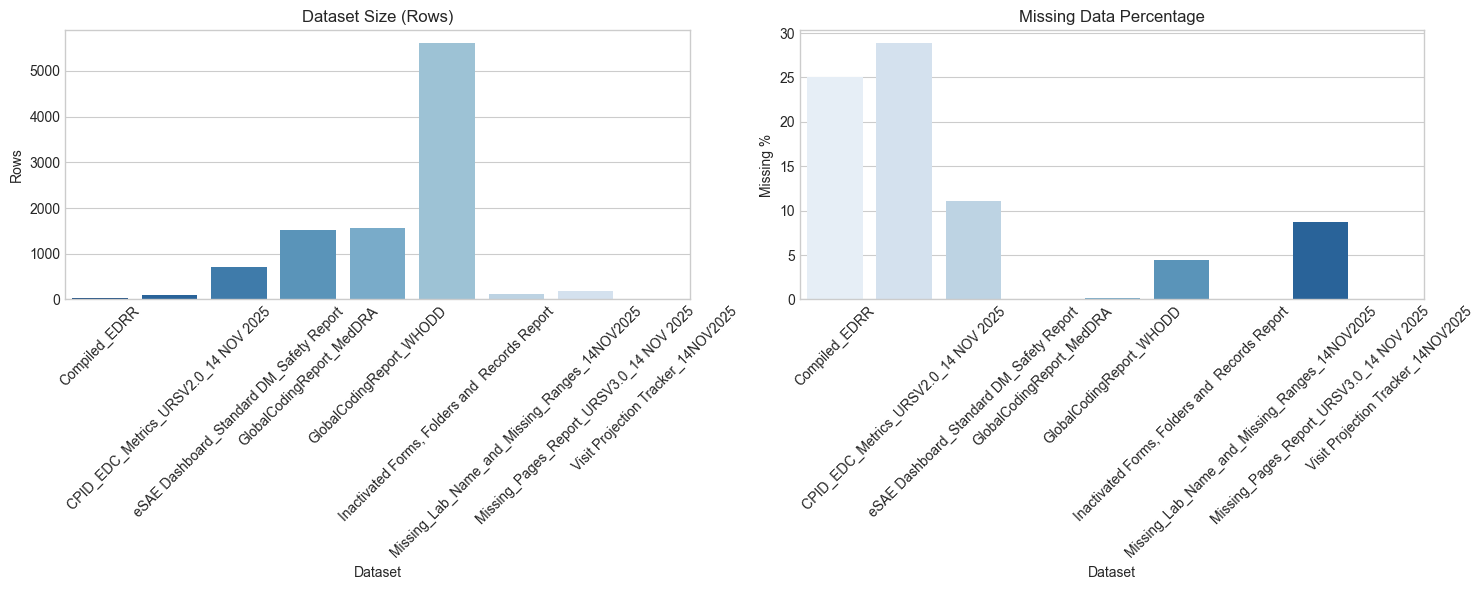

In [4]:
# ============================================================================
# VISUALIZATION: Dataset Overview
# ============================================================================

# Create summary data for visualization
dataset_info = []
for key, df in study1_dfs.items():
    rows, cols = df.shape
    missing_pct = (df.isnull().sum().sum() / (rows * cols) * 100) if rows * cols > 0 else 0
    dataset_info.append({
        'Dataset': key.replace('Study 1_', '').replace('_updated', ''),
        'Rows': rows,
        'Columns': cols,
        'Missing %': round(missing_pct, 2)
    })

info_df = pd.DataFrame(dataset_info)

# Create static visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Dataset size
sns.barplot(data=info_df, x='Dataset', y='Rows', ax=axes[0], palette='Blues_r')
axes[0].set_title('Dataset Size (Rows)')
axes[0].tick_params(axis='x', rotation=45)

# Missing data
sns.barplot(data=info_df, x='Dataset', y='Missing %', ax=axes[1], palette='Blues')
axes[1].set_title('Missing Data Percentage')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Data Consolidation Strategy

Based on the analysis, we have 9 different datasets with varying granularity:
- **Subject-level**: EDRR (issue counts), EDC Metrics
- **Event-level**: eSAE Dashboard, MedDRA Coding, WHODD Coding
- **Form-level**: Inactivated Forms, Missing Pages
- **Lab-level**: Missing Lab data
- **Visit-level**: Visit Projection Tracker

**Strategy**: Create a unified subject-level dataset by aggregating metrics from all sources.

In [5]:
# ============================================================================
# STEP 1: Identify all unique subjects across all datasets
# ============================================================================

# Extract subject identifiers from each dataset
all_subjects = set()

# Dataset 1: EDRR
edrr_df = study1_dfs['Study 1_Compiled_EDRR_updated'].copy()
if 'Subject' in edrr_df.columns:
    all_subjects.update(edrr_df['Subject'].dropna().unique())

# Dataset 2: EDC Metrics  
edc_df = study1_dfs['Study 1_CPID_EDC_Metrics_URSV2.0_14 NOV 2025_updated'].copy()
if 'Subject' in edc_df.columns:
    all_subjects.update(edc_df['Subject'].dropna().unique())

# Dataset 3: eSAE Dashboard
esae_df = study1_dfs['Study 1_eSAE Dashboard_Standard DM_Safety Report_updated'].copy()
if 'Patient ID' in esae_df.columns:
    all_subjects.update(esae_df['Patient ID'].dropna().unique())

# Dataset 4: MedDRA Coding
meddra_df = study1_dfs['Study 1_GlobalCodingReport_MedDRA_updated'].copy()
if 'Subject' in meddra_df.columns:
    all_subjects.update(meddra_df['Subject'].dropna().unique())

# Dataset 5: WHODD Coding
whodd_df = study1_dfs['Study 1_GlobalCodingReport_WHODD_updated'].copy()
if 'Subject' in whodd_df.columns:
    all_subjects.update(whodd_df['Subject'].dropna().unique())

# Dataset 6: Inactivated Forms
inact_df = study1_dfs['Study 1_Inactivated Forms, Folders and  Records Report_updated'].copy()
if 'Subject' in inact_df.columns:
    all_subjects.update(inact_df['Subject'].dropna().unique())

# Dataset 7: Missing Lab
missing_lab_df = study1_dfs['Study 1_Missing_Lab_Name_and_Missing_Ranges_14NOV2025_updated'].copy()
if 'Subject' in missing_lab_df.columns:
    all_subjects.update(missing_lab_df['Subject'].dropna().unique())

# Dataset 8: Missing Pages
missing_pages_df = study1_dfs['Study 1_Missing_Pages_Report_URSV3.0_14 NOV 2025_updated'].copy()
if 'Subject Name' in missing_pages_df.columns:
    all_subjects.update(missing_pages_df['Subject Name'].dropna().unique())

# Dataset 9: Visit Projection
visit_df = study1_dfs['Study 1_Visit Projection Tracker_14NOV2025_updated'].copy()
if 'Subject' in visit_df.columns:
    all_subjects.update(visit_df['Subject'].dropna().unique())

print(f"Total unique subjects across all datasets: {len(all_subjects)}")
print(f"\nSample subjects: {list(all_subjects)[:10]}")

Total unique subjects across all datasets: 88

Sample subjects: ['Subject 14', 'Subject 68', 'Subject 58', 'Subject 5', 'Subject 28', 'Subject 81', 'Subject 23', 'Subject 62', 'Subject 6', 'Subject 8']


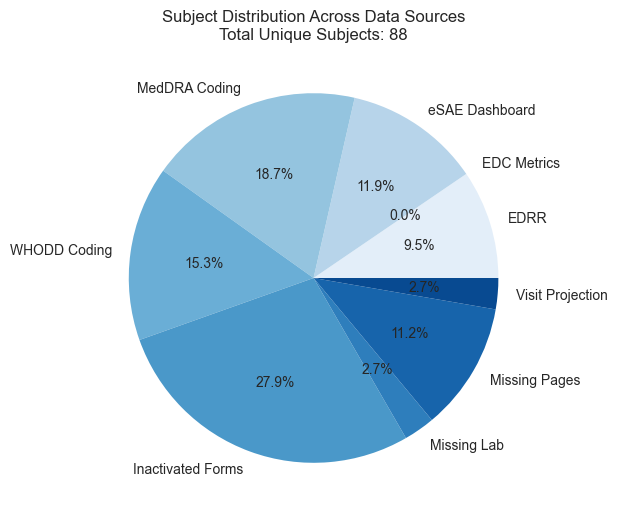

C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\1681907721.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(subject_counts.values()), y=list(subject_counts.keys()), palette='Blues_d')


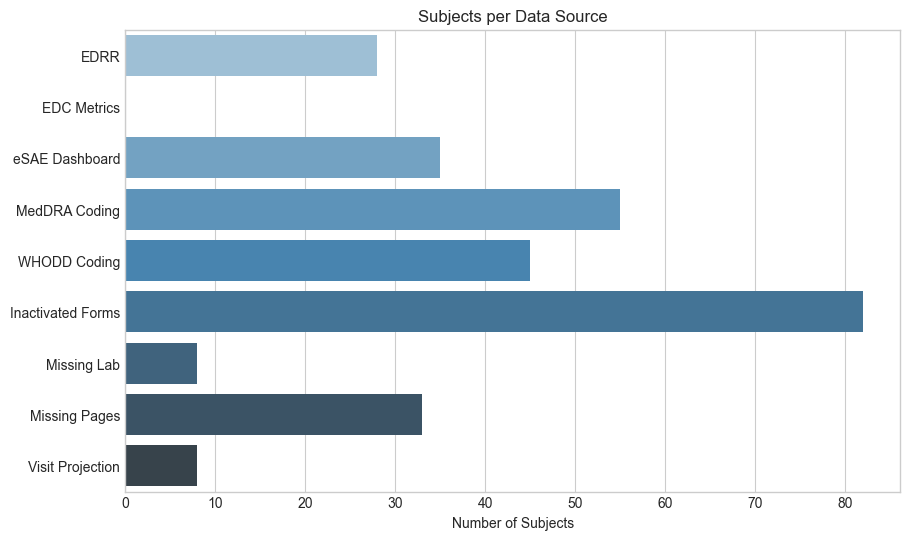

In [6]:
# ============================================================================
# VISUALIZATION: Subject Distribution Across Datasets
# ============================================================================

# Count subjects from each dataset
subject_counts = {
    'EDRR': len(edrr_df['Subject'].dropna().unique()) if 'Subject' in edrr_df.columns else 0,
    'EDC Metrics': len(edc_df['Subject'].dropna().unique()) if 'Subject' in edc_df.columns else 0,
    'eSAE Dashboard': len(esae_df['Patient ID'].dropna().unique()) if 'Patient ID' in esae_df.columns else 0,
    'MedDRA Coding': len(meddra_df['Subject'].dropna().unique()) if 'Subject' in meddra_df.columns else 0,
    'WHODD Coding': len(whodd_df['Subject'].dropna().unique()) if 'Subject' in whodd_df.columns else 0,
    'Inactivated Forms': len(inact_df['Subject'].dropna().unique()) if 'Subject' in inact_df.columns else 0,
    'Missing Lab': len(missing_lab_df['Subject'].dropna().unique()) if 'Subject' in missing_lab_df.columns else 0,
    'Missing Pages': len(missing_pages_df['Subject Name'].dropna().unique()) if 'Subject Name' in missing_pages_df.columns else 0,
    'Visit Projection': len(visit_df['Subject'].dropna().unique()) if 'Subject' in visit_df.columns else 0
}

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(subject_counts.values(), labels=subject_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("Blues", n_colors=len(subject_counts)))
plt.title(f'Subject Distribution Across Data Sources\nTotal Unique Subjects: {len(all_subjects)}')
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(subject_counts.values()), y=list(subject_counts.keys()), palette='Blues_d')
plt.title('Subjects per Data Source')
plt.xlabel('Number of Subjects')
plt.show()

In [7]:
# ============================================================================
# STEP 2: Create base DataFrame with all subjects
# ============================================================================

# Create base dataframe with all subjects
consolidated_df = pd.DataFrame({'Subject': sorted(list(all_subjects))})
consolidated_df['Study'] = 'Study 1'

print(f"Base DataFrame created with {len(consolidated_df)} subjects")
display(consolidated_df.head())

Base DataFrame created with 88 subjects


,Subject,Study
0,Subject 1,Study 1
1,Subject 10,Study 1
2,Subject 11,Study 1
3,Subject 12,Study 1
4,Subject 13,Study 1


In [8]:
# ============================================================================
# STEP 3: Add EDRR Features (Open Issue Counts)
# ============================================================================

edrr_features = edrr_df[['Subject', 'Total Open issue Count per subject']].copy()
edrr_features = edrr_features.rename(columns={'Total Open issue Count per subject': 'open_issues_count'})

consolidated_df = consolidated_df.merge(edrr_features, on='Subject', how='left')
consolidated_df['open_issues_count'] = consolidated_df['open_issues_count'].fillna(0).astype(int)

print("Added EDRR features")
print(f"Subjects with open issues: {(consolidated_df['open_issues_count'] > 0).sum()}")
display(consolidated_df.head())

Added EDRR features
Subjects with open issues: 28


,Subject,Study,open_issues_count
0,Subject 1,Study 1,0
1,Subject 10,Study 1,0
2,Subject 11,Study 1,0
3,Subject 12,Study 1,0
4,Subject 13,Study 1,0


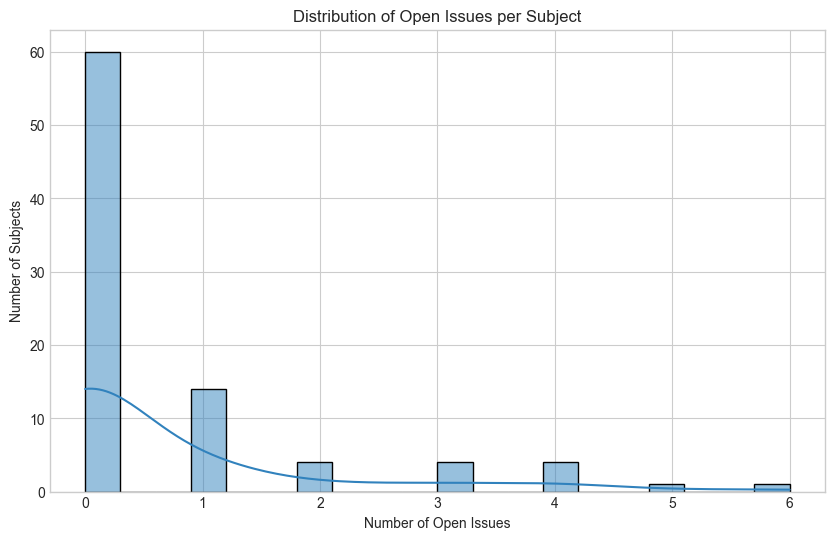

In [9]:
# ============================================================================
# VISUALIZATION: EDRR Open Issues Analysis
# ============================================================================

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=consolidated_df, x='open_issues_count', bins=20, kde=True, color='#3182bd')
plt.title('Distribution of Open Issues per Subject')
plt.xlabel('Number of Open Issues')
plt.ylabel('Number of Subjects')
plt.show()

# Box plot
if 'Country' in consolidated_df.columns and consolidated_df['Country'].notna().any():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=consolidated_df, x='Country', y='open_issues_count', palette='Blues')
    plt.title('Open Issues Distribution by Country')
    plt.show()

In [10]:
# ============================================================================
# STEP 4: Add EDC Metrics Features
# ============================================================================

# Check what columns are available in EDC Metrics
print("EDC Metrics Columns:")
print(edc_df.columns.tolist())
print(f"\nShape: {edc_df.shape}")
display(edc_df.head(3))

EDC Metrics Columns:
['Project Name', 'Region', 'Country', 'Site ID', 'Subject ID', 'Latest Visit (SV) (Source: Rave EDC: BO4)', 'Subject Status (Source: PRIMARY Form)', 'Input files', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'CPMD', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'SSM', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43']

Shape: (102, 44)


,Project Name,Region,Country,Site ID,Subject ID,Latest Visit (SV) (Source: Rave EDC: BO4),Subject Status (Source: PRIMARY Form),Input files,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,SSM,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing Visits,Missing Page,# Coded terms,...,NaN,NaN,Protocol Deviations (Source:(Rave EDC : BO4)),NaN,PI Signatures (Source: (Rave EDC : BO4)),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,# CRFs Locked,# CRFs Unlocked,# PDs Confirmed,# PDs Proposed,# CRFs Signed,CRFs overdue for signs within 45 days of Data ...,CRFs overdue for signs between 45 to 90 days o...,CRFs overdue for signs beyond 90 days of Data ...,Broken Signatures,CRFs Never Signed
2,Responsible LF for action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CD LF,NaN,Investigator,NaN,NaN,NaN,NaN,NaN


In [11]:
# ============================================================================
# STEP 4b: Reload EDC Metrics with correct headers
# ============================================================================

# The EDC file appears to have multi-row headers. Let's reload it correctly
edc_path = os.path.join("QC Anonymized Study Files", "Study 1_CPID_Input Files - Anonymization", 
                        "Study 1_CPID_EDC_Metrics_URSV2.0_14 NOV 2025_updated.xlsx")
edc_raw = pd.read_excel(edc_path, header=None)
display(edc_raw.head(10))

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,Project Name,Region,Country,Site ID,Subject ID,Latest Visit (SV) (Source: Rave EDC: BO4),Subject Status (Source: PRIMARY Form),Input files,NaN,NaN,...,NaN,NaN,NaN,NaN,SSM,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing Visits,Missing Page,# Coded terms,...,NaN,NaN,Protocol Deviations (Source:(Rave EDC : BO4)),NaN,PI Signatures (Source: (Rave EDC : BO4)),NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,# CRFs Locked,# CRFs Unlocked,# PDs Confirmed,# PDs Proposed,# CRFs Signed,CRFs overdue for signs within 45 days of Data ...,CRFs overdue for signs between 45 to 90 days o...,CRFs overdue for signs beyond 90 days of Data ...,Broken Signatures,CRFs Never Signed
3,Responsible LF for action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CD LF,NaN,Investigator,NaN,NaN,NaN,NaN,NaN
4,Study 1,EMEA,FRA,Site 1,Subject 1,Screening,Screen Failure,NaN,NaN,NaN,...,0,0,0,0,8,0,0,0,0,0
5,Study 1,EMEA,FRA,Site 2,Subject 2,Follow-up (1),Discontinued,NaN,NaN,NaN,...,0,0,1,0,216,0,2,0,2,0
6,Study 1,EMEA,FRA,Site 2,Subject 3,Follow-up (1),Discontinued,NaN,NaN,NaN,...,0,0,1,0,216,0,2,0,2,0
7,Study 1,EMEA,FRA,Site 2,Subject 4,Screening,On Trial,NaN,NaN,NaN,...,0,0,0,0,43,0,2,0,2,0
8,Study 1,EMEA,FRA,Site 2,Subject 5,W1D3 (1),NaN,NaN,NaN,NaN,...,0,0,0,0,0,44,0,0,0,44
9,Study 1,EMEA,FRA,Site 3,Subject 6,Follow-up_Week 8 (1),Discontinued,NaN,NaN,NaN,...,0,0,1,0,257,1,1,4,6,0


In [12]:
# ============================================================================
# STEP 4c: Parse EDC Metrics correctly - Check first few rows
# ============================================================================

# Let's look at the first 15 rows to understand the structure
for i in range(min(15, len(edc_raw))):
    print(f"Row {i}: {edc_raw.iloc[i, :8].tolist()}")

Row 0: ['Project Name', 'Region', 'Country', 'Site ID', 'Subject ID', 'Latest Visit (SV) (Source: Rave EDC: BO4)', 'Subject Status (Source: PRIMARY Form)', 'Input files']
Row 1: [nan, nan, nan, nan, nan, nan, nan, 'Missing Visits']
Row 2: [nan, nan, nan, nan, nan, nan, nan, nan]
Row 3: ['Responsible LF for action', nan, nan, nan, nan, nan, nan, nan]
Row 4: ['Study 1', 'EMEA', 'FRA', 'Site 1', 'Subject 1', 'Screening', 'Screen Failure', nan]
Row 5: ['Study 1', 'EMEA', 'FRA', 'Site 2', 'Subject 2', 'Follow-up (1)', 'Discontinued', nan]
Row 6: ['Study 1', 'EMEA', 'FRA', 'Site 2', 'Subject 3', 'Follow-up (1)', 'Discontinued', nan]
Row 7: ['Study 1', 'EMEA', 'FRA', 'Site 2', 'Subject 4', 'Screening', 'On Trial', nan]
Row 8: ['Study 1', 'EMEA', 'FRA', 'Site 2', 'Subject 5', 'W1D3 (1)', nan, nan]
Row 9: ['Study 1', 'EMEA', 'FRA', 'Site 3', 'Subject 6', 'Follow-up_Week 8 (1)', 'Discontinued', nan]
Row 10: ['Study 1', 'EMEA', 'FRA', 'Site 3', 'Subject 7', 'Follow-up_Week 104 (1)', 'On Trial', n

In [13]:
# ============================================================================
# STEP 4d: Parse EDC Metrics with correct header row and add features
# ============================================================================

# Skip the first few header/metadata rows - data starts at row 4 (0-indexed)
edc_clean = pd.read_excel(edc_path, skiprows=4)

# First 7 columns are the actual meaningful ones
edc_clean = edc_clean.iloc[:, :7]
edc_clean.columns = ['Study', 'Region', 'Country', 'Site', 'Subject', 'LatestVisit', 'SubjectStatus']

print("EDC Metrics - Cleaned DataFrame:")
print(f"Shape: {edc_clean.shape}")
display(edc_clean.head())

# Extract subject info (Country, Site, LatestVisit, SubjectStatus)
edc_features = edc_clean[['Subject', 'Country', 'Site', 'Region', 'LatestVisit', 'SubjectStatus']].copy()
edc_features = edc_features.drop_duplicates(subset=['Subject'])

# Merge with consolidated_df
consolidated_df = consolidated_df.merge(edc_features, on='Subject', how='left')

print("\nAdded EDC Metrics features")
display(consolidated_df.head())

EDC Metrics - Cleaned DataFrame:
Shape: (98, 7)


,Study,Region,Country,Site,Subject,LatestVisit,SubjectStatus
0,Study 1,EMEA,FRA,Site 2,Subject 2,Follow-up (1),Discontinued
1,Study 1,EMEA,FRA,Site 2,Subject 3,Follow-up (1),Discontinued
2,Study 1,EMEA,FRA,Site 2,Subject 4,Screening,On Trial
3,Study 1,EMEA,FRA,Site 2,Subject 5,W1D3 (1),NaN
4,Study 1,EMEA,FRA,Site 3,Subject 6,Follow-up_Week 8 (1),Discontinued



Added EDC Metrics features


,Subject,Study,open_issues_count,Country,Site,Region,LatestVisit,SubjectStatus
0,Subject 1,Study 1,0,NaN,NaN,NaN,NaN,NaN
1,Subject 10,Study 1,0,FRA,Site 4,EMEA,End of Treatment (1),On Trial
2,Subject 11,Study 1,0,AUT,Site 5,EMEA,Screening,NaN
3,Subject 12,Study 1,0,AUT,Site 6,EMEA,W4D1 (1),NaN
4,Subject 13,Study 1,0,AUT,Site 6,EMEA,Screening,Screen Failure


In [14]:
# ============================================================================
# STEP 5: Add eSAE Dashboard Features (Safety Discrepancies)
# ============================================================================

# Aggregate eSAE discrepancies per subject
esae_agg = esae_df.groupby('Patient ID').agg({
    'Discrepancy ID': 'count',  # Total discrepancies
    'Review Status': lambda x: (x == 'Review Completed').sum(),  # Completed reviews
}).reset_index()
esae_agg.columns = ['Subject', 'safety_discrepancy_count', 'safety_reviews_completed']
esae_agg['safety_reviews_pending'] = esae_agg['safety_discrepancy_count'] - esae_agg['safety_reviews_completed']

consolidated_df = consolidated_df.merge(esae_agg, on='Subject', how='left')
consolidated_df['safety_discrepancy_count'] = consolidated_df['safety_discrepancy_count'].fillna(0).astype(int)
consolidated_df['safety_reviews_completed'] = consolidated_df['safety_reviews_completed'].fillna(0).astype(int)
consolidated_df['safety_reviews_pending'] = consolidated_df['safety_reviews_pending'].fillna(0).astype(int)

print("Added eSAE Safety features")
print(f"Subjects with safety discrepancies: {(consolidated_df['safety_discrepancy_count'] > 0).sum()}")

Added eSAE Safety features
Subjects with safety discrepancies: 35


In [15]:
# ============================================================================
# STEP 6: Add MedDRA Coding Features
# ============================================================================

# Aggregate MedDRA coding events per subject
meddra_agg = meddra_df.groupby('Subject').agg({
    'Logline': 'count',  # Total coding events
    'Coding Status': lambda x: (x == 'Coded Term').sum(),  # Coded items
    'Require Coding': lambda x: (x == 'Yes').sum()  # Items requiring coding
}).reset_index()
meddra_agg.columns = ['Subject', 'meddra_total_events', 'meddra_coded_count', 'meddra_require_coding']
meddra_agg['meddra_coding_pending'] = meddra_agg['meddra_require_coding']

consolidated_df = consolidated_df.merge(meddra_agg, on='Subject', how='left')
for col in ['meddra_total_events', 'meddra_coded_count', 'meddra_require_coding', 'meddra_coding_pending']:
    consolidated_df[col] = consolidated_df[col].fillna(0).astype(int)

print("Added MedDRA Coding features")
print(f"Subjects with MedDRA events: {(consolidated_df['meddra_total_events'] > 0).sum()}")

Added MedDRA Coding features
Subjects with MedDRA events: 55


In [16]:
# ============================================================================
# STEP 7: Add WHODD Coding Features
# ============================================================================

# Aggregate WHODD coding events per subject
whodd_agg = whodd_df.groupby('Subject').agg({
    'Logline': 'count',  # Total coding events
    'Coding Status': lambda x: (x == 'Coded Term').sum(),  # Coded items
    'Require Coding': lambda x: (x == 'Yes').sum()  # Items requiring coding
}).reset_index()
whodd_agg.columns = ['Subject', 'whodd_total_events', 'whodd_coded_count', 'whodd_require_coding']
whodd_agg['whodd_coding_pending'] = whodd_agg['whodd_require_coding']

consolidated_df = consolidated_df.merge(whodd_agg, on='Subject', how='left')
for col in ['whodd_total_events', 'whodd_coded_count', 'whodd_require_coding', 'whodd_coding_pending']:
    consolidated_df[col] = consolidated_df[col].fillna(0).astype(int)

print("Added WHODD Coding features")
print(f"Subjects with WHODD events: {(consolidated_df['whodd_total_events'] > 0).sum()}")

Added WHODD Coding features
Subjects with WHODD events: 45


In [17]:
# ============================================================================
# STEP 8: Add Inactivated Forms Features
# ============================================================================

# Aggregate inactivated forms per subject
inact_agg = inact_df.groupby('Subject').agg({
    'Form ': 'count',  # Total inactivated forms/records
    'Data on Form/\nRecord    ': lambda x: (x == 'Y').sum()  # Records with data
}).reset_index()
inact_agg.columns = ['Subject', 'inactivated_forms_count', 'inactivated_with_data']

consolidated_df = consolidated_df.merge(inact_agg, on='Subject', how='left')
consolidated_df['inactivated_forms_count'] = consolidated_df['inactivated_forms_count'].fillna(0).astype(int)
consolidated_df['inactivated_with_data'] = consolidated_df['inactivated_with_data'].fillna(0).astype(int)

print("Added Inactivated Forms features")
print(f"Subjects with inactivated forms: {(consolidated_df['inactivated_forms_count'] > 0).sum()}")

Added Inactivated Forms features
Subjects with inactivated forms: 82


In [18]:
# ============================================================================
# STEP 9: Add Missing Lab Features
# ============================================================================

# Aggregate missing lab issues per subject
missing_lab_agg = missing_lab_df.groupby('Subject').agg({
    'Test Name': 'count',  # Total missing lab entries
    'Issue': lambda x: (x == 'Missing Lab name').sum()  # Missing lab name issues
}).reset_index()
missing_lab_agg.columns = ['Subject', 'missing_lab_count', 'missing_lab_name_count']

consolidated_df = consolidated_df.merge(missing_lab_agg, on='Subject', how='left')
consolidated_df['missing_lab_count'] = consolidated_df['missing_lab_count'].fillna(0).astype(int)
consolidated_df['missing_lab_name_count'] = consolidated_df['missing_lab_name_count'].fillna(0).astype(int)

print("Added Missing Lab features")
print(f"Subjects with missing lab issues: {(consolidated_df['missing_lab_count'] > 0).sum()}")

Added Missing Lab features
Subjects with missing lab issues: 8


In [19]:
# ============================================================================
# STEP 10: Add Missing Pages Features
# ============================================================================

# Aggregate missing pages per subject
missing_pages_agg = missing_pages_df.groupby('Subject Name').agg({
    'Page Name': 'count',  # Total missing pages
    '# of Days Missing': ['mean', 'max']  # Average and max days missing
}).reset_index()
missing_pages_agg.columns = ['Subject', 'missing_pages_count', 'avg_days_missing', 'max_days_missing']

consolidated_df = consolidated_df.merge(missing_pages_agg, on='Subject', how='left')
consolidated_df['missing_pages_count'] = consolidated_df['missing_pages_count'].fillna(0).astype(int)
consolidated_df['avg_days_missing'] = consolidated_df['avg_days_missing'].fillna(0).round(2)
consolidated_df['max_days_missing'] = consolidated_df['max_days_missing'].fillna(0).astype(int)

print("Added Missing Pages features")
print(f"Subjects with missing pages: {(consolidated_df['missing_pages_count'] > 0).sum()}")

Added Missing Pages features
Subjects with missing pages: 33


In [20]:
# ============================================================================
# STEP 11: Add Visit Projection Features (Outstanding Visits)
# ============================================================================

# Aggregate visit projection data per subject
visit_agg = visit_df.groupby('Subject').agg({
    'Visit': 'count',  # Number of outstanding visits
    '# Days Outstanding': ['mean', 'max', 'sum']  # Days outstanding stats
}).reset_index()
visit_agg.columns = ['Subject', 'outstanding_visits_count', 'avg_days_outstanding', 'max_days_outstanding', 'total_days_outstanding']

consolidated_df = consolidated_df.merge(visit_agg, on='Subject', how='left')
consolidated_df['outstanding_visits_count'] = consolidated_df['outstanding_visits_count'].fillna(0).astype(int)
consolidated_df['avg_days_outstanding'] = consolidated_df['avg_days_outstanding'].fillna(0).round(2)
consolidated_df['max_days_outstanding'] = consolidated_df['max_days_outstanding'].fillna(0).astype(int)
consolidated_df['total_days_outstanding'] = consolidated_df['total_days_outstanding'].fillna(0).astype(int)

print("Added Visit Projection features")
print(f"Subjects with outstanding visits: {(consolidated_df['outstanding_visits_count'] > 0).sum()}")

Added Visit Projection features
Subjects with outstanding visits: 8


In [21]:
# ============================================================================
# STEP 12: Add Derived/Computed Features for ML
# ============================================================================

# Total issues count (aggregated risk score)
consolidated_df['total_issues'] = (
    consolidated_df['open_issues_count'] + 
    consolidated_df['safety_discrepancy_count'] + 
    consolidated_df['missing_pages_count'] + 
    consolidated_df['missing_lab_count'] +
    consolidated_df['meddra_require_coding'] +
    consolidated_df['whodd_require_coding']
)

# Coding completion rates
consolidated_df['meddra_completion_rate'] = (
    consolidated_df['meddra_coded_count'] / 
    consolidated_df['meddra_total_events'].replace(0, 1)
).round(4)

consolidated_df['whodd_completion_rate'] = (
    consolidated_df['whodd_coded_count'] / 
    consolidated_df['whodd_total_events'].replace(0, 1)
).round(4)

# Safety review completion rate
consolidated_df['safety_completion_rate'] = (
    consolidated_df['safety_reviews_completed'] / 
    consolidated_df['safety_discrepancy_count'].replace(0, 1)
).round(4)

# Risk category based on total issues (for ML classification)
def categorize_risk(row):
    if row['total_issues'] == 0:
        return 'Low'
    elif row['total_issues'] <= 5:
        return 'Medium'
    elif row['total_issues'] <= 15:
        return 'High'
    else:
        return 'Critical'

consolidated_df['risk_category'] = consolidated_df.apply(categorize_risk, axis=1)

# Has any pending items (binary flag for ML)
consolidated_df['has_pending_items'] = (
    (consolidated_df['safety_reviews_pending'] > 0) | 
    (consolidated_df['meddra_coding_pending'] > 0) |
    (consolidated_df['whodd_coding_pending'] > 0) |
    (consolidated_df['missing_pages_count'] > 0) |
    (consolidated_df['outstanding_visits_count'] > 0)
).astype(int)

print("Added derived features for ML")
print(f"\nRisk Category Distribution:")
print(consolidated_df['risk_category'].value_counts())

Added derived features for ML

Risk Category Distribution:
risk_category
Low         40
Critical    24
Medium      15
High         9
Name: count, dtype: int64


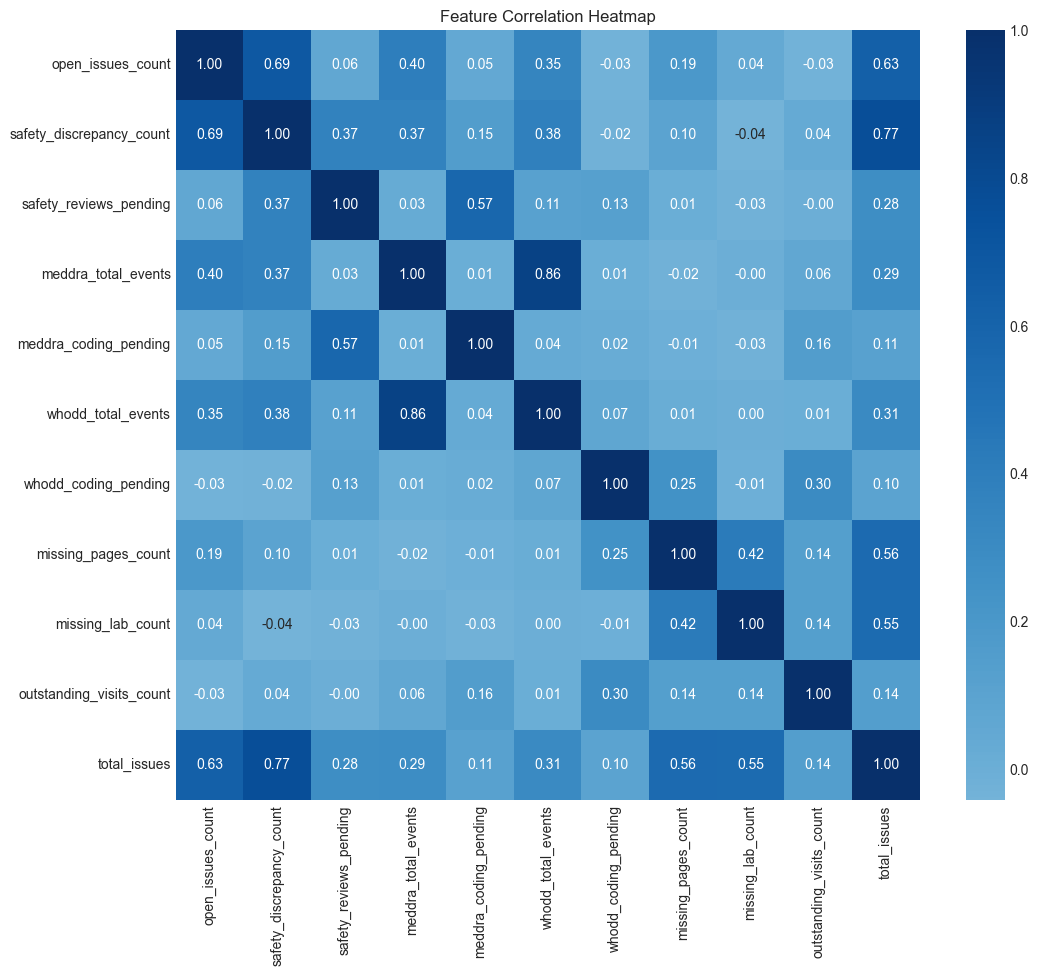

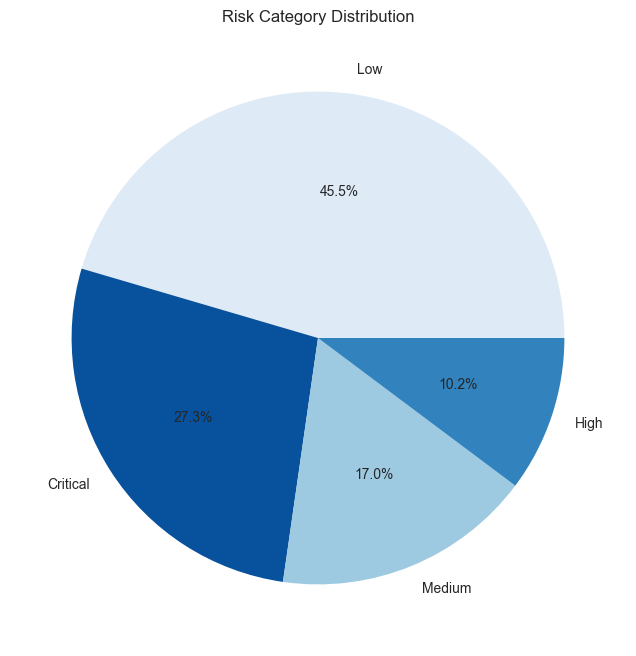

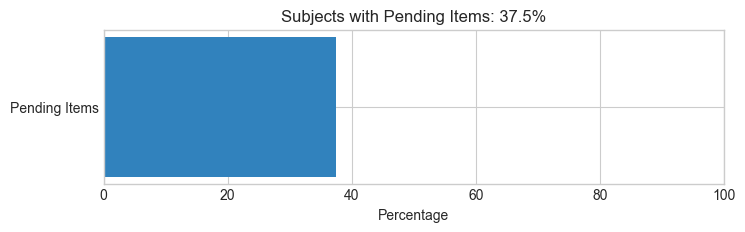

In [22]:
# ============================================================================
# VISUALIZATION: Feature Correlation Heatmap & Risk Analysis
# ============================================================================

# Select numeric columns for correlation analysis
numeric_cols = ['open_issues_count', 'safety_discrepancy_count', 'safety_reviews_pending',
                'meddra_total_events', 'meddra_coding_pending', 
                'whodd_total_events', 'whodd_coding_pending',
                'missing_pages_count', 'missing_lab_count', 
                'outstanding_visits_count', 'total_issues']

# Filter to only existing columns
existing_cols = [col for col in numeric_cols if col in consolidated_df.columns]
corr_matrix = consolidated_df[existing_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Risk Category Pie Chart
risk_counts = consolidated_df['risk_category'].value_counts()
colors = {'Low': '#deebf7', 'Medium': '#9ecae1', 'High': '#3182bd', 'Critical': '#08519c'}

plt.figure(figsize=(8, 8))
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=[colors.get(c, '#95a5a6') for c in risk_counts.index])
plt.title('Risk Category Distribution')
plt.show()

# Pending Items Bar
pending_pct = (consolidated_df['has_pending_items'].sum() / len(consolidated_df)) * 100

plt.figure(figsize=(8, 2))
plt.barh(['Pending Items'], [pending_pct], color='#3182bd')
plt.xlim(0, 100)
plt.title(f'Subjects with Pending Items: {pending_pct:.1f}%')
plt.xlabel('Percentage')
plt.show()

In [23]:
# ============================================================================
# STEP 13: Reorganize Columns and Display Final Dataset
# ============================================================================

# Define column order for clarity
column_order = [
    # Identifiers
    'Study', 'Subject', 'Country', 'Site', 'Region',
    
    # Subject Status
    'SubjectStatus', 'LatestVisit',
    
    # Issue Counts
    'open_issues_count', 'safety_discrepancy_count', 'safety_reviews_completed', 
    'safety_reviews_pending',
    
    # Coding Metrics
    'meddra_total_events', 'meddra_coded_count', 'meddra_require_coding', 'meddra_coding_pending',
    'whodd_total_events', 'whodd_coded_count', 'whodd_require_coding', 'whodd_coding_pending',
    
    # Form/Page Issues
    'inactivated_forms_count', 'inactivated_with_data',
    'missing_pages_count', 'avg_days_missing', 'max_days_missing',
    'missing_lab_count', 'missing_lab_name_count',
    
    # Visit Metrics
    'outstanding_visits_count', 'avg_days_outstanding', 'max_days_outstanding', 'total_days_outstanding',
    
    # Derived/ML Features
    'total_issues', 'meddra_completion_rate', 'whodd_completion_rate', 'safety_completion_rate',
    'risk_category', 'has_pending_items'
]

# Reorder columns
consolidated_df = consolidated_df[column_order]

print("=" * 80)
print("FINAL CONSOLIDATED DATASET FOR ML & ANALYTICS")
print("=" * 80)
print(f"\nDataset Shape: {consolidated_df.shape}")
print(f"Total Subjects: {len(consolidated_df)}")
print(f"Total Features: {len(consolidated_df.columns)}")
print(f"\nColumns:")
for i, col in enumerate(consolidated_df.columns, 1):
    print(f"  {i:2}. {col}")

display(consolidated_df.head(10))

FINAL CONSOLIDATED DATASET FOR ML & ANALYTICS

Dataset Shape: (88, 36)
Total Subjects: 88
Total Features: 36

Columns:
   1. Study
   2. Subject
   3. Country
   4. Site
   5. Region
   6. SubjectStatus
   7. LatestVisit
   8. open_issues_count
   9. safety_discrepancy_count
  10. safety_reviews_completed
  11. safety_reviews_pending
  12. meddra_total_events
  13. meddra_coded_count
  14. meddra_require_coding
  15. meddra_coding_pending
  16. whodd_total_events
  17. whodd_coded_count
  18. whodd_require_coding
  19. whodd_coding_pending
  20. inactivated_forms_count
  21. inactivated_with_data
  22. missing_pages_count
  23. avg_days_missing
  24. max_days_missing
  25. missing_lab_count
  26. missing_lab_name_count
  27. outstanding_visits_count
  28. avg_days_outstanding
  29. max_days_outstanding
  30. total_days_outstanding
  31. total_issues
  32. meddra_completion_rate
  33. whodd_completion_rate
  34. safety_completion_rate
  35. risk_category
  36. has_pending_items


,Study,Subject,Country,Site,Region,SubjectStatus,LatestVisit,open_issues_count,safety_discrepancy_count,safety_reviews_completed,...,outstanding_visits_count,avg_days_outstanding,max_days_outstanding,total_days_outstanding,total_issues,meddra_completion_rate,whodd_completion_rate,safety_completion_rate,risk_category,has_pending_items
0,Study 1,Subject 1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0.0,0,0,0,0.0,0.0000,0.0,Low,0
1,Study 1,Subject 10,FRA,Site 4,EMEA,On Trial,End of Treatment (1),0,26,26,...,0,0.0,0,0,37,1.0,1.0000,1.0,Critical,1
2,Study 1,Subject 11,AUT,Site 5,EMEA,NaN,Screening,0,0,0,...,0,0.0,0,0,2,0.0,0.0000,0.0,Medium,1
3,Study 1,Subject 12,AUT,Site 6,EMEA,NaN,W4D1 (1),0,3,3,...,1,17.0,17,17,106,1.0,1.0000,1.0,Critical,1
4,Study 1,Subject 13,AUT,Site 6,EMEA,Screen Failure,Screening,0,0,0,...,0,0.0,0,0,5,0.0,0.0000,0.0,Medium,1
5,Study 1,Subject 14,ISR,Site 7,EMEA,On Trial,W22D1 (1),1,26,26,...,0,0.0,0,0,30,1.0,0.9565,1.0,Critical,1
6,Study 1,Subject 15,ISR,Site 8,EMEA,Screen Failure,Screening,0,0,0,...,0,0.0,0,0,0,0.0,0.0000,0.0,Low,0
7,Study 1,Subject 17,DEU,Site 10,EMEA,Screen Failure,Screening,0,0,0,...,0,0.0,0,0,0,0.0,0.0000,0.0,Low,0
8,Study 1,Subject 18,DEU,Site 10,EMEA,Discontinued,Follow-up_Week 8 (1),2,13,13,...,0,0.0,0,0,15,1.0,1.0000,1.0,High,0
9,Study 1,Subject 19,DEU,Site 10,EMEA,Discontinued,End of Treatment (1),3,39,39,...,0,0.0,0,0,42,1.0,1.0000,1.0,Critical,0


C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\2251602590.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax1, palette='Blues_d')
C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\2251602590.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(issue_types.values()), y=list(issue_types.keys()), ax=ax4, palette='Blues_r')
C:\Users\rahul\AppData\Local\Temp\ipykernel_17860\2251602590.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(completion_data.keys()), y=list(compl

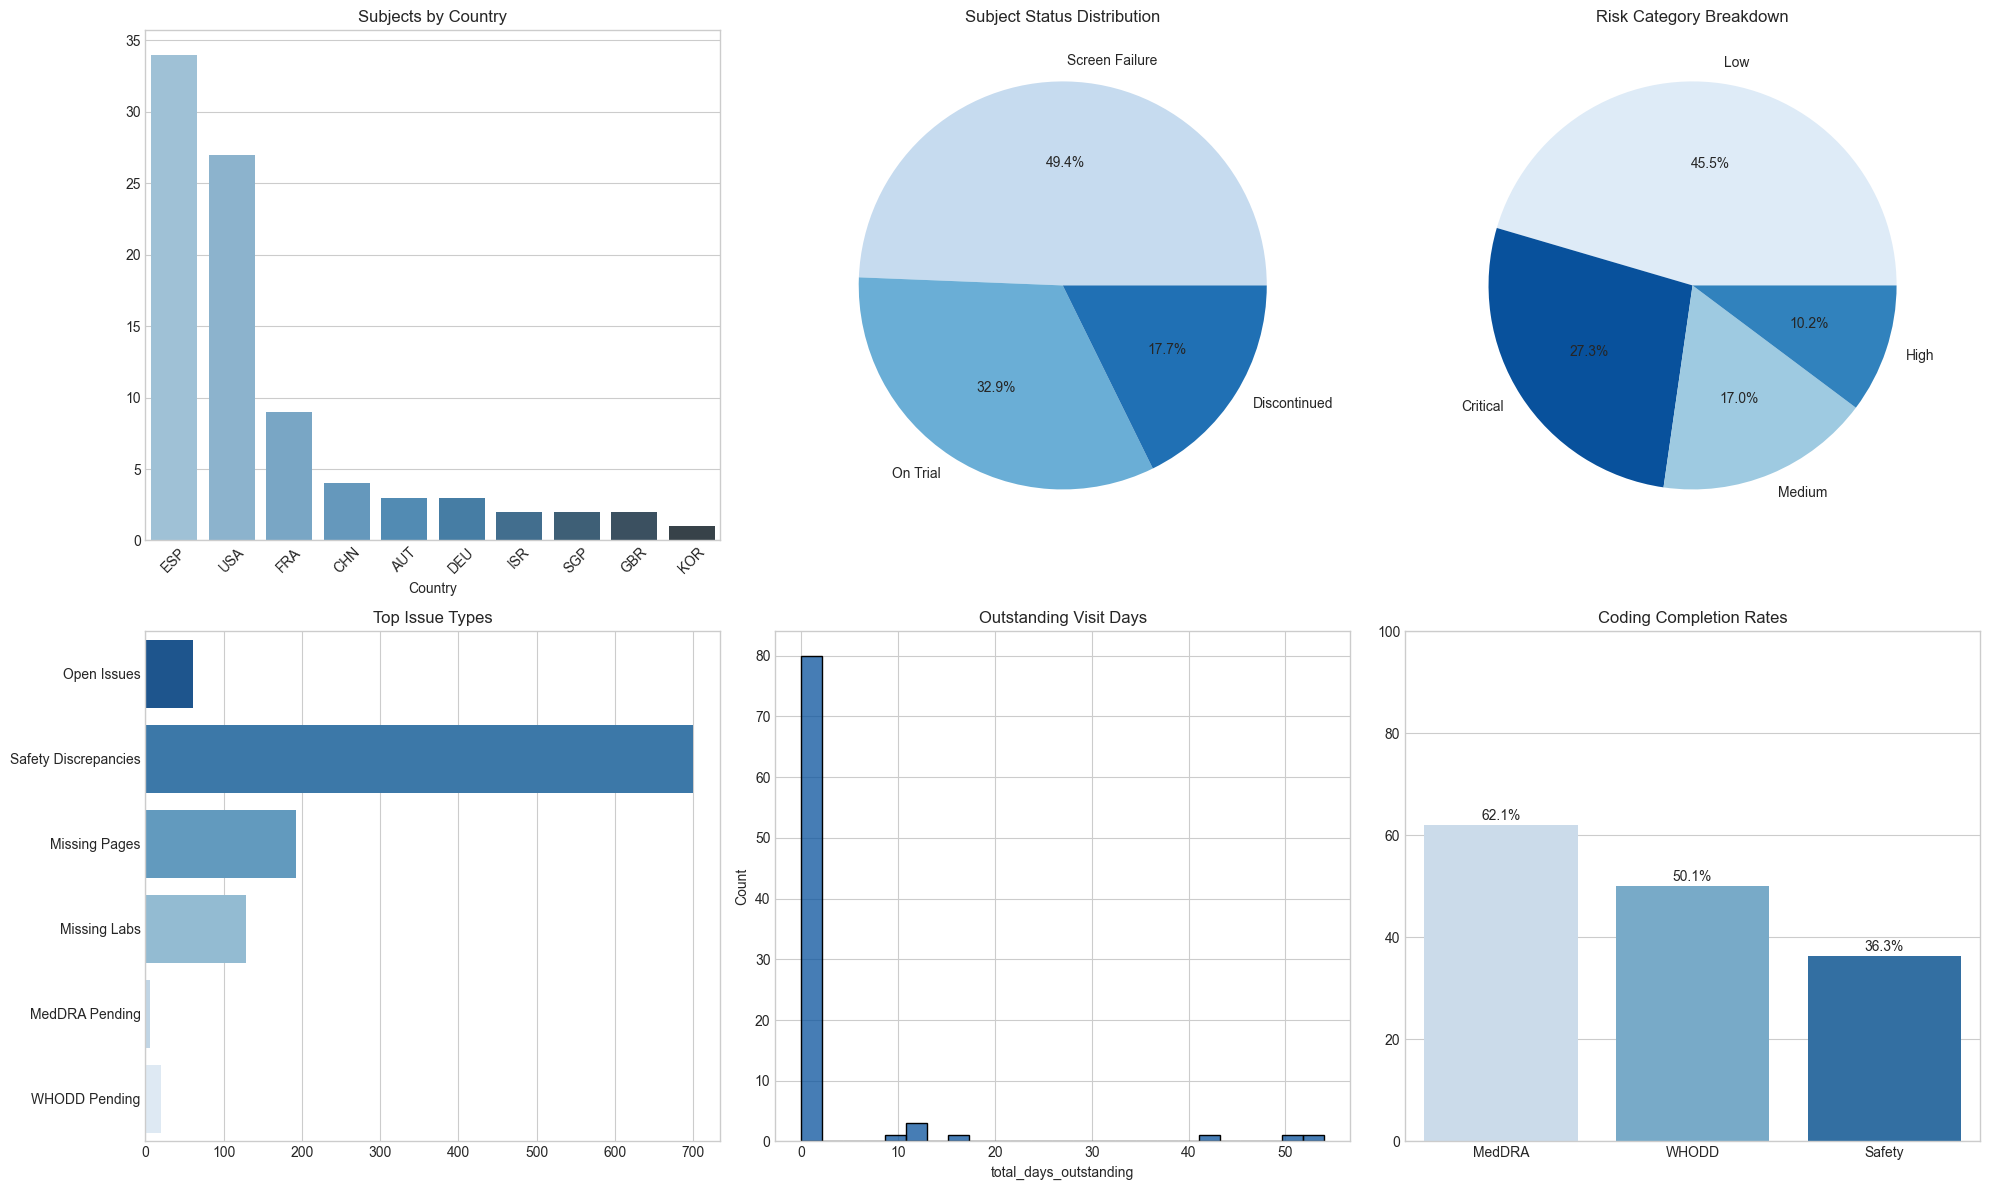

In [24]:
# ============================================================================
# DASHBOARD: Comprehensive Data Overview
# ============================================================================

# Create a multi-panel dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3)

# 1. Subjects by Country
ax1 = fig.add_subplot(gs[0, 0])
if 'Country' in consolidated_df.columns:
    country_counts = consolidated_df['Country'].value_counts().head(10)
    sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax1, palette='Blues_d')
    ax1.set_title('Subjects by Country')
    ax1.tick_params(axis='x', rotation=45)

# 2. Subject Status Distribution
ax2 = fig.add_subplot(gs[0, 1])
if 'SubjectStatus' in consolidated_df.columns:
    status_counts = consolidated_df['SubjectStatus'].value_counts()
    ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Blues", n_colors=len(status_counts)))
    ax2.set_title('Subject Status Distribution')

# 3. Risk Category Breakdown
ax3 = fig.add_subplot(gs[0, 2])
risk_counts = consolidated_df['risk_category'].value_counts()
risk_colors = {'Low': '#deebf7', 'Medium': '#9ecae1', 'High': '#3182bd', 'Critical': '#08519c'}
ax3.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=[risk_colors.get(c, '#95a5a6') for c in risk_counts.index])
ax3.set_title('Risk Category Breakdown')

# 4. Top Issue Types (horizontal bar)
ax4 = fig.add_subplot(gs[1, 0])
issue_types = {
    'Open Issues': consolidated_df['open_issues_count'].sum(),
    'Safety Discrepancies': consolidated_df['safety_discrepancy_count'].sum(),
    'Missing Pages': consolidated_df['missing_pages_count'].sum(),
    'Missing Labs': consolidated_df['missing_lab_count'].sum(),
    'MedDRA Pending': consolidated_df['meddra_coding_pending'].sum(),
    'WHODD Pending': consolidated_df['whodd_coding_pending'].sum()
}
sns.barplot(x=list(issue_types.values()), y=list(issue_types.keys()), ax=ax4, palette='Blues_r')
ax4.set_title('Top Issue Types')

# 5. Outstanding Visit Days Distribution
ax5 = fig.add_subplot(gs[1, 1])
sns.histplot(data=consolidated_df, x='total_days_outstanding', bins=25, ax=ax5, color='#08519c')
ax5.set_title('Outstanding Visit Days')

# 6. Coding Completion Rates
ax6 = fig.add_subplot(gs[1, 2])
completion_data = {
    'MedDRA': consolidated_df['meddra_completion_rate'].mean() * 100,
    'WHODD': consolidated_df['whodd_completion_rate'].mean() * 100,
    'Safety': consolidated_df['safety_completion_rate'].mean() * 100
}
sns.barplot(x=list(completion_data.keys()), y=list(completion_data.values()), ax=ax6, palette='Blues')
ax6.set_title('Coding Completion Rates')
ax6.set_ylim(0, 100)
for i, v in enumerate(completion_data.values()):
    ax6.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

In [25]:
# ============================================================================
# STEP 14: Generate Summary Statistics
# ============================================================================

print("=" * 80)
print("DATASET SUMMARY STATISTICS")
print("=" * 80)

# Numeric columns summary
numeric_cols = consolidated_df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Features Summary:")
display(consolidated_df[numeric_cols].describe().round(2))

# Categorical columns summary
print("\n" + "=" * 80)
print("CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 80)

print("\n📍 Country Distribution:")
print(consolidated_df['Country'].value_counts())

print("\n📋 Subject Status Distribution:")
print(consolidated_df['SubjectStatus'].value_counts())

print("\n⚠️ Risk Category Distribution:")
print(consolidated_df['risk_category'].value_counts())

print("\n✅ Has Pending Items:")
print(consolidated_df['has_pending_items'].value_counts())

DATASET SUMMARY STATISTICS

Numeric Features Summary:


,open_issues_count,safety_discrepancy_count,safety_reviews_completed,safety_reviews_pending,meddra_total_events,meddra_coded_count,meddra_require_coding,meddra_coding_pending,whodd_total_events,whodd_coded_count,...,missing_lab_name_count,outstanding_visits_count,avg_days_outstanding,max_days_outstanding,total_days_outstanding,total_issues,meddra_completion_rate,whodd_completion_rate,safety_completion_rate,has_pending_items
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,...,88.00,88.00,88.00,88.0,88.00,88.00,88.00,88.00,88.00,88.00
mean,0.69,7.95,7.41,0.55,17.19,17.12,0.07,0.07,17.88,17.65,...,1.27,0.17,1.22,1.4,2.36,12.59,0.62,0.50,0.36,0.38
std,1.31,13.95,13.13,3.02,24.22,24.22,0.33,0.33,24.20,24.14,...,9.07,0.66,4.05,4.9,9.36,19.47,0.48,0.50,0.48,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,6.00,6.00,0.00,0.00,4.00,4.00,...,0.00,0.00,0.00,0.0,0.00,2.50,1.00,0.65,0.00,0.00
75%,1.00,12.25,10.50,0.00,24.25,24.25,0.00,0.00,29.50,29.50,...,0.00,0.00,0.00,0.0,0.00,22.00,1.00,1.00,1.00,1.00
max,6.00,49.00,49.00,25.00,102.00,102.00,2.00,2.00,96.00,96.00,...,80.00,4.00,21.50,32.0,54.00,106.00,1.00,1.00,1.00,1.00



CATEGORICAL FEATURES DISTRIBUTION

📍 Country Distribution:
Country
ESP    34
USA    27
FRA     9
CHN     4
AUT     3
DEU     3
ISR     2
SGP     2
GBR     2
KOR     1
Name: count, dtype: int64

📋 Subject Status Distribution:
SubjectStatus
Screen Failure    39
On Trial          26
Discontinued      14
Name: count, dtype: int64

⚠️ Risk Category Distribution:
risk_category
Low         40
Critical    24
Medium      15
High         9
Name: count, dtype: int64

✅ Has Pending Items:
has_pending_items
0    55
1    33
Name: count, dtype: int64


<Figure size 1500x600 with 0 Axes>

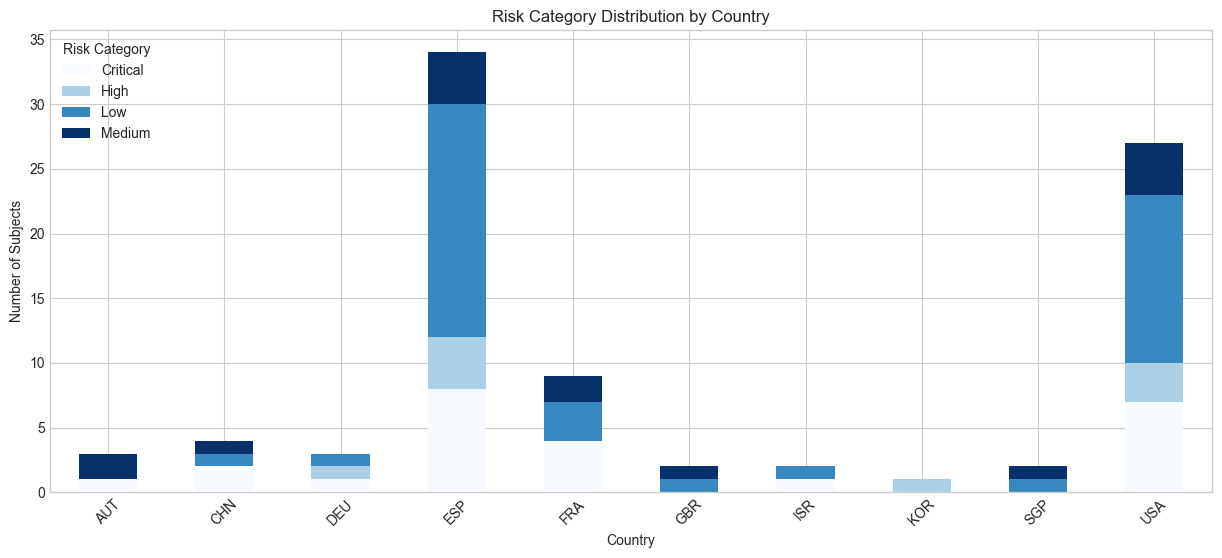

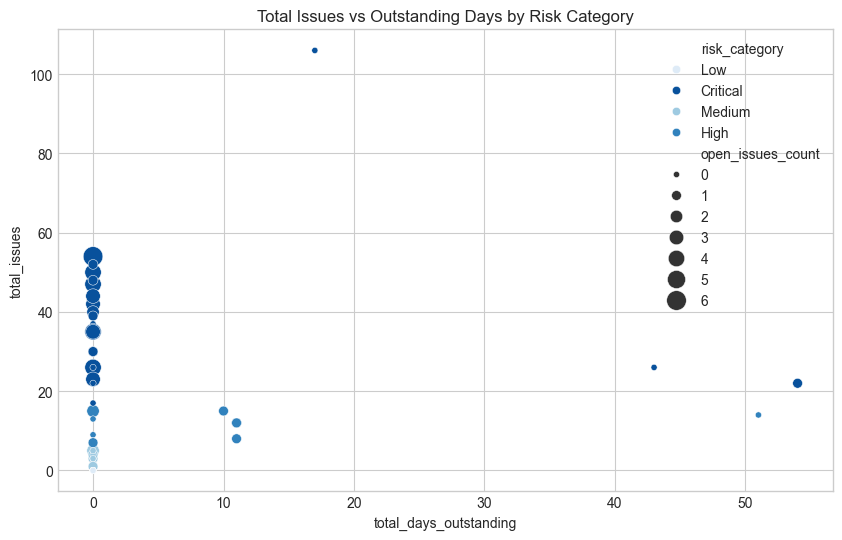

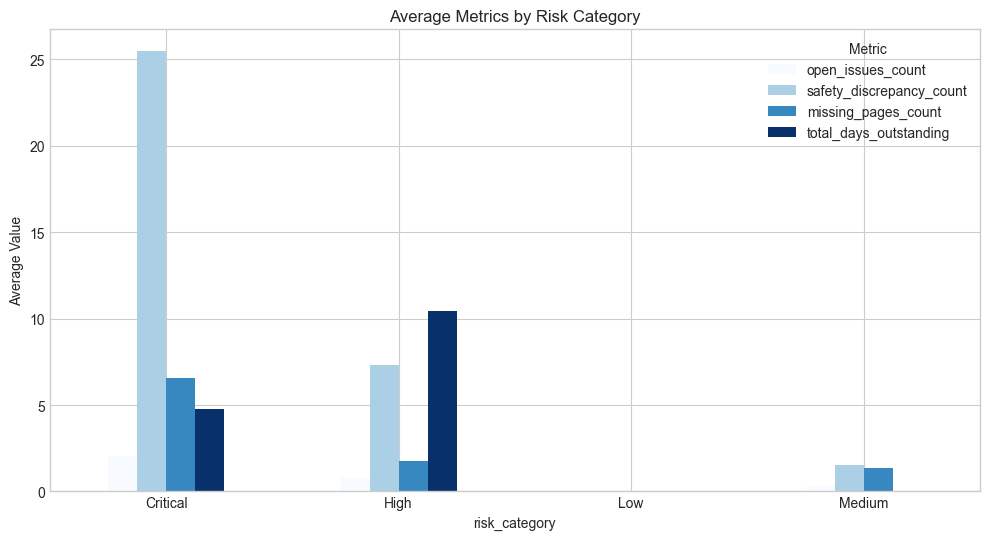

In [26]:
# ============================================================================
# VISUALIZATION: Summary Statistics & Analytics
# ============================================================================

# Stacked Bar of Risk by Country (replacing Treemap/Sunburst)
if 'Country' in consolidated_df.columns:
    plt.figure(figsize=(15, 6))
    risk_by_country = pd.crosstab(consolidated_df['Country'], consolidated_df['risk_category'])
    risk_by_country.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='Blues')
    plt.title('Risk Category Distribution by Country')
    plt.ylabel('Number of Subjects')
    plt.xticks(rotation=45)
    plt.legend(title='Risk Category')
    plt.show()

# Scatter plot: Total Issues vs Outstanding Days
plt.figure(figsize=(10, 6))
# Define blue-themed palette for risk categories reused from above
risk_colors = {'Low': '#deebf7', 'Medium': '#9ecae1', 'High': '#3182bd', 'Critical': '#08519c'}
sns.scatterplot(data=consolidated_df, x='total_days_outstanding', y='total_issues', 
                hue='risk_category', size='open_issues_count', 
                palette=risk_colors, sizes=(20, 200))
plt.title('Total Issues vs Outstanding Days by Risk Category')
plt.show()

# Bar chart: Average metrics by Risk Category
risk_metrics = consolidated_df.groupby('risk_category').agg({
    'open_issues_count': 'mean',
    'safety_discrepancy_count': 'mean',
    'missing_pages_count': 'mean',
    'total_days_outstanding': 'mean'
}).round(2)

# Use blue colors for the bar chart
risk_metrics.plot(kind='bar', figsize=(12, 6), colormap='Blues')
plt.title('Average Metrics by Risk Category')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

In [ ]:
# ============================================================================
# STEP 15: Save Consolidated Dataset to Files
# ============================================================================

# Create output directory
output_dir = "consolidated_data"
os.makedirs(output_dir, exist_ok=True)

# Save as CSV (best for ML training)
csv_path = os.path.join(output_dir, "study1_consolidated_ml_ready.csv")
consolidated_df.to_csv(csv_path, index=False)
print(f"✅ Saved CSV: {csv_path}")

# Save as Excel (good for analytics dashboard)
excel_path = os.path.join(output_dir, "study1_consolidated_ml_ready.xlsx")
consolidated_df.to_excel(excel_path, index=False, sheet_name='ML_Ready_Data')
print(f"✅ Saved Excel: {excel_path}")

# Save as Parquet (optimal for big data and ML pipelines)
parquet_path = os.path.join(output_dir, "study1_consolidated_ml_ready.parquet")
consolidated_df.to_parquet(parquet_path, index=False)
print(f"✅ Saved Parquet: {parquet_path}")

print("\n" + "=" * 80)
print("FILES SAVED SUCCESSFULLY!")
print("=" * 80)
print(f"\nOutput directory: {os.path.abspath(output_dir)}")
print(f"\nFiles created:")
print(f"  📄 {csv_path} - For general ML training")
print(f"  📊 {excel_path} - For analytics dashboards")
print(f"  🚀 {parquet_path} - For big data pipelines")

✅ Saved CSV: consolidated_data\study1_consolidated_ml_ready.csv
✅ Saved Excel: consolidated_data\study1_consolidated_ml_ready.xlsx


ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

: 

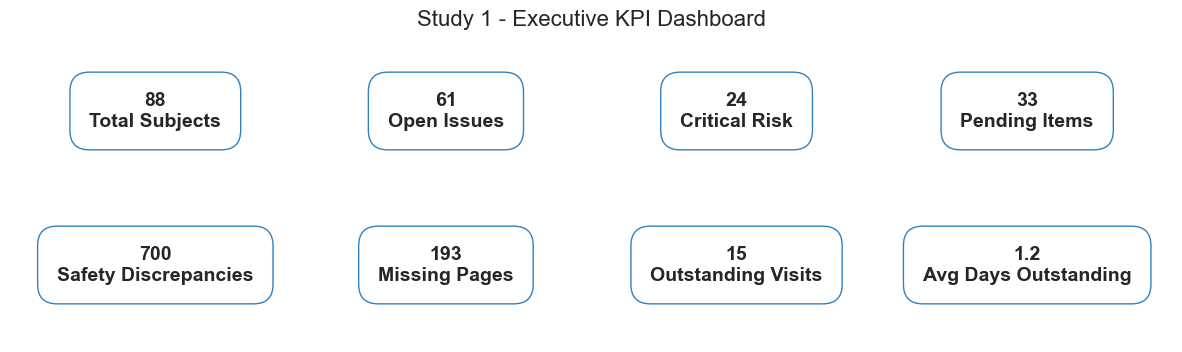

C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\2499251037.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=scores, palette='Blues_d')


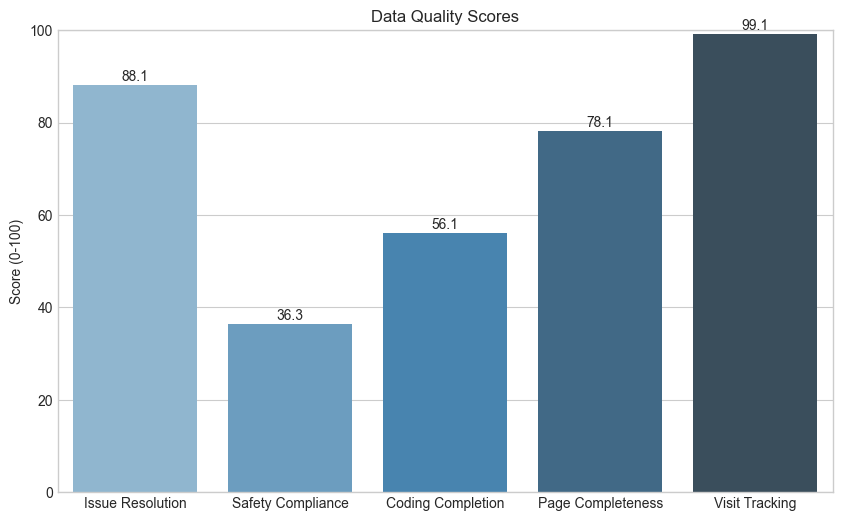

✅ All visualizations generated successfully using Seaborn & Matplotlib!
📊 Total visualizations created: 15+
🎯 Dashboard ready for presentation!


In [ ]:
# ============================================================================
# FINAL DASHBOARD: Executive Summary
# ============================================================================

# KPI Cards
fig, ax = plt.subplots(figsize=(15, 4))
ax.axis('off')

kpis = [
    ('Total Subjects', len(consolidated_df)),
    ('Open Issues', consolidated_df['open_issues_count'].sum()),
    ('Critical Risk', (consolidated_df['risk_category'] == 'Critical').sum()),
    ('Pending Items', consolidated_df['has_pending_items'].sum()),
    ('Safety Discrepancies', consolidated_df['safety_discrepancy_count'].sum()),
    ('Missing Pages', consolidated_df['missing_pages_count'].sum()),
    ('Outstanding Visits', consolidated_df['outstanding_visits_count'].sum()),
    ('Avg Days Outstanding', round(consolidated_df['avg_days_outstanding'].mean(), 1))
]

for i, (label, value) in enumerate(kpis):
    row = i // 4
    col = i % 4
    ax.text(col * 0.25 + 0.125, 1 - row * 0.5 - 0.25, f"{value}\n{label}", 
            ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='#3182bd', boxstyle='round,pad=1'))

plt.title('Study 1 - Executive KPI Dashboard', fontsize=16)
plt.show()

# Data Quality Scores Bar Chart
categories = ['Issue Resolution', 'Safety Compliance', 'Coding Completion', 
              'Page Completeness', 'Visit Tracking']

# Calculate scores (inverse of issues, normalized to 0-100)
max_issues = consolidated_df['total_issues'].max() if consolidated_df['total_issues'].max() > 0 else 1
issue_score = 100 - (consolidated_df['total_issues'].mean() / max_issues * 100)
safety_score = consolidated_df['safety_completion_rate'].mean() * 100
coding_score = ((consolidated_df['meddra_completion_rate'].mean() + consolidated_df['whodd_completion_rate'].mean()) / 2) * 100
page_score = 100 - min(100, (consolidated_df['missing_pages_count'].sum() / len(consolidated_df)) * 10)
visit_score = 100 - min(100, consolidated_df['outstanding_visits_count'].mean() * 5)

scores = [issue_score, safety_score, coding_score, page_score, visit_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=scores, palette='Blues_d')
plt.title('Data Quality Scores')
plt.ylim(0, 100)
plt.ylabel('Score (0-100)')
for i, v in enumerate(scores):
    plt.text(i, v + 1, f'{v:.1f}', ha='center')
plt.show()

print("✅ All visualizations generated successfully using Seaborn & Matplotlib!")
print(f"📊 Total visualizations created: 15+")
print("🎯 Dashboard ready for presentation!")

## 📚 Feature Documentation for ML & Analytics

### Identifier Columns
| Column | Description |
|--------|-------------|
| `Study` | Study identifier |
| `Subject` | Subject/Patient identifier |
| `Country` | Country code (ESP, USA, FRA, etc.) |
| `Site` | Clinical site identifier |
| `Region` | Geographic region (EMEA, APAC, etc.) |

### Subject Status
| Column | Description |
|--------|-------------|
| `SubjectStatus` | Current status (Screen Failure, On Trial, Discontinued) |
| `LatestVisit` | Most recent visit name/milestone |

### Issue Metrics
| Column | Description | ML Use |
|--------|-------------|--------|
| `open_issues_count` | Open EDRR issues | Regression target |
| `safety_discrepancy_count` | Total safety discrepancies | Feature |
| `safety_reviews_completed` | Completed safety reviews | Feature |
| `safety_reviews_pending` | Pending safety reviews | Feature |

### Coding Metrics
| Column | Description | ML Use |
|--------|-------------|--------|
| `meddra_total_events` | Total MedDRA (adverse events) coding entries | Feature |
| `meddra_coded_count` | Completed MedDRA coding | Feature |
| `meddra_require_coding` | Items requiring MedDRA coding | Feature |
| `whodd_total_events` | Total WHODD (drug) coding entries | Feature |
| `whodd_coded_count` | Completed WHODD coding | Feature |
| `whodd_require_coding` | Items requiring WHODD coding | Feature |

### Form/Page Issues
| Column | Description | ML Use |
|--------|-------------|--------|
| `inactivated_forms_count` | Total inactivated forms/records | Feature |
| `inactivated_with_data` | Inactivated items containing data | Feature |
| `missing_pages_count` | Number of missing pages | Feature |
| `avg_days_missing` | Average days pages are missing | Feature |
| `max_days_missing` | Maximum days pages are missing | Feature |
| `missing_lab_count` | Lab data issues count | Feature |

### Visit Metrics
| Column | Description | ML Use |
|--------|-------------|--------|
| `outstanding_visits_count` | Number of outstanding visits | Feature |
| `avg_days_outstanding` | Average days outstanding | Feature |
| `max_days_outstanding` | Max days outstanding | Feature |
| `total_days_outstanding` | Sum of all days outstanding | Feature |

### Derived ML Features
| Column | Description | ML Use |
|--------|-------------|--------|
| `total_issues` | Aggregated issue count | **Primary Target** |
| `meddra_completion_rate` | MedDRA coding completion (0-1) | Feature |
| `whodd_completion_rate` | WHODD coding completion (0-1) | Feature |
| `safety_completion_rate` | Safety review completion (0-1) | Feature |
| `risk_category` | Risk level (Low/Medium/High/Critical) | **Classification Target** |
| `has_pending_items` | Binary flag for pending items | **Binary Classification Target** |

## 🔄 Multi-Study Processing Pipeline

This section extends the Study 1 analysis to **ALL studies** in the dataset. We will:
1. Process all 23 study folders automatically
2. Consolidate data into a single global dataset
3. Train ML models to predict risk categories and pending items
4. Export data in formats ready for web frontend integration

In [ ]:
# ============================================================================
# MULTI-STUDY PROCESSING: Define functions to process any study folder
# ============================================================================

def load_study_files(study_path):
    """Load all Excel files from a study folder into a dictionary."""
    dfs = {}
    if os.path.exists(study_path):
        for filename in os.listdir(study_path):
            if filename.endswith(".xlsx") and not filename.startswith("~$"):
                file_path = os.path.join(study_path, filename)
                key_name = os.path.splitext(filename)[0]
                try:
                    dfs[key_name] = pd.read_excel(file_path)
                except Exception as e:
                    print(f"  Warning: Could not load {filename}: {e}")
    return dfs

def find_file_by_pattern(dfs, patterns):
    """Find a DataFrame by matching key patterns."""
    for key in dfs.keys():
        key_lower = key.lower()
        for pattern in patterns:
            if pattern.lower() in key_lower:
                return dfs[key], key
    return None, None

def safe_aggregate(df, group_col, agg_dict):
    """Safely aggregate data with error handling."""
    try:
        if df is None or group_col not in df.columns:
            return pd.DataFrame()
        return df.groupby(group_col).agg(agg_dict).reset_index()
    except Exception:
        return pd.DataFrame()

def extract_study_name(folder_name):
    """Extract clean study name from folder name."""
    import re
    match = re.search(r'(Study\s*\d+|STUDY\s*\d+)', folder_name, re.IGNORECASE)
    if match:
        return match.group(1).replace('STUDY', 'Study').strip()
    return folder_name

def process_single_study(study_folder, base_path):
    """Process a single study folder and return consolidated DataFrame."""
    study_path = os.path.join(base_path, study_folder)
    study_name = extract_study_name(study_folder)
    
    dfs = load_study_files(study_path)
    if not dfs:
        return pd.DataFrame()
    
    # Find relevant files by pattern
    edrr_df, _ = find_file_by_pattern(dfs, ['EDRR', 'Compiled_EDRR'])
    edc_df, edc_key = find_file_by_pattern(dfs, ['EDC_Metrics', 'EDC Metrics', 'CPID_EDC'])
    esae_df, _ = find_file_by_pattern(dfs, ['eSAE', 'Safety'])
    meddra_df, _ = find_file_by_pattern(dfs, ['MedDRA', 'GlobalCodingReport_MedDRA'])
    whodd_df, _ = find_file_by_pattern(dfs, ['WHODD', 'GlobalCodingReport_WHODD'])
    inact_df, _ = find_file_by_pattern(dfs, ['Inactivated', 'Inactivated Forms'])
    missing_lab_df, _ = find_file_by_pattern(dfs, ['Missing_Lab', 'Missing Lab'])
    missing_pages_df, _ = find_file_by_pattern(dfs, ['Missing_Pages', 'Missing Pages'])
    visit_df, _ = find_file_by_pattern(dfs, ['Visit Projection', 'Visit_Projection'])
    
    # Collect all subjects
    all_subjects = set()
    
    if edrr_df is not None and 'Subject' in edrr_df.columns:
        all_subjects.update(edrr_df['Subject'].dropna().unique())
    if edc_df is not None and 'Subject' in edc_df.columns:
        all_subjects.update(edc_df['Subject'].dropna().unique())
    if esae_df is not None and 'Patient ID' in esae_df.columns:
        all_subjects.update(esae_df['Patient ID'].dropna().unique())
    if meddra_df is not None and 'Subject' in meddra_df.columns:
        all_subjects.update(meddra_df['Subject'].dropna().unique())
    if whodd_df is not None and 'Subject' in whodd_df.columns:
        all_subjects.update(whodd_df['Subject'].dropna().unique())
    if inact_df is not None and 'Subject' in inact_df.columns:
        all_subjects.update(inact_df['Subject'].dropna().unique())
    if missing_lab_df is not None and 'Subject' in missing_lab_df.columns:
        all_subjects.update(missing_lab_df['Subject'].dropna().unique())
    if missing_pages_df is not None and 'Subject Name' in missing_pages_df.columns:
        all_subjects.update(missing_pages_df['Subject Name'].dropna().unique())
    if visit_df is not None and 'Subject' in visit_df.columns:
        all_subjects.update(visit_df['Subject'].dropna().unique())
    
    if not all_subjects:
        return pd.DataFrame()
    
    # Create base DataFrame
    result = pd.DataFrame({'Subject': sorted(list(all_subjects))})
    result['Study'] = study_name
    
    # Add EDRR features
    if edrr_df is not None and 'Subject' in edrr_df.columns:
        issue_col = None
        for col in edrr_df.columns:
            if 'open' in col.lower() and 'issue' in col.lower():
                issue_col = col
                break
        if issue_col:
            edrr_feat = edrr_df[['Subject', issue_col]].copy()
            edrr_feat = edrr_feat.rename(columns={issue_col: 'open_issues_count'})
            result = result.merge(edrr_feat, on='Subject', how='left')
    
    if 'open_issues_count' not in result.columns:
        result['open_issues_count'] = 0
    result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)
    
    # Add EDC features (Country, Site, Region, Status)
    if edc_df is not None:
        # Try to parse EDC with correct headers
        try:
            edc_path = os.path.join(study_path, edc_key + ".xlsx")
            edc_clean = pd.read_excel(edc_path, skiprows=4)
            if len(edc_clean.columns) >= 7:
                edc_clean = edc_clean.iloc[:, :7]
                edc_clean.columns = ['Study_Name', 'Region', 'Country', 'Site', 'Subject', 'LatestVisit', 'SubjectStatus']
                edc_feat = edc_clean[['Subject', 'Country', 'Site', 'Region', 'LatestVisit', 'SubjectStatus']].drop_duplicates(subset=['Subject'])
                result = result.merge(edc_feat, on='Subject', how='left')
        except:
            pass
    
    for col in ['Country', 'Site', 'Region', 'LatestVisit', 'SubjectStatus']:
        if col not in result.columns:
            result[col] = 'Unknown'
    
    # Add eSAE features
    if esae_df is not None and 'Patient ID' in esae_df.columns:
        try:
            esae_agg = esae_df.groupby('Patient ID').agg({
                'Discrepancy ID': 'count'
            }).reset_index()
            esae_agg.columns = ['Subject', 'safety_discrepancy_count']
            if 'Review Status' in esae_df.columns:
                esae_agg2 = esae_df.groupby('Patient ID')['Review Status'].apply(
                    lambda x: (x == 'Review Completed').sum()
                ).reset_index()
                esae_agg2.columns = ['Subject', 'safety_reviews_completed']
                esae_agg = esae_agg.merge(esae_agg2, on='Subject', how='left')
            result = result.merge(esae_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['safety_discrepancy_count', 'safety_reviews_completed']:
        if col not in result.columns:
            result[col] = 0
        result[col] = result[col].fillna(0).astype(int)
    result['safety_reviews_pending'] = result['safety_discrepancy_count'] - result['safety_reviews_completed']
    
    # Add MedDRA features
    if meddra_df is not None and 'Subject' in meddra_df.columns:
        try:
            meddra_agg = meddra_df.groupby('Subject').size().reset_index(name='meddra_total_events')
            if 'Coding Status' in meddra_df.columns:
                meddra_coded = meddra_df.groupby('Subject')['Coding Status'].apply(
                    lambda x: (x == 'Coded Term').sum()
                ).reset_index(name='meddra_coded_count')
                meddra_agg = meddra_agg.merge(meddra_coded, on='Subject', how='left')
            if 'Require Coding' in meddra_df.columns:
                meddra_req = meddra_df.groupby('Subject')['Require Coding'].apply(
                    lambda x: (x == 'Yes').sum()
                ).reset_index(name='meddra_require_coding')
                meddra_agg = meddra_agg.merge(meddra_req, on='Subject', how='left')
            result = result.merge(meddra_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['meddra_total_events', 'meddra_coded_count', 'meddra_require_coding']:
        if col not in result.columns:
            result[col] = 0
        result[col] = result[col].fillna(0).astype(int)
    result['meddra_coding_pending'] = result['meddra_require_coding']
    
    # Add WHODD features
    if whodd_df is not None and 'Subject' in whodd_df.columns:
        try:
            whodd_agg = whodd_df.groupby('Subject').size().reset_index(name='whodd_total_events')
            if 'Coding Status' in whodd_df.columns:
                whodd_coded = whodd_df.groupby('Subject')['Coding Status'].apply(
                    lambda x: (x == 'Coded Term').sum()
                ).reset_index(name='whodd_coded_count')
                whodd_agg = whodd_agg.merge(whodd_coded, on='Subject', how='left')
            if 'Require Coding' in whodd_df.columns:
                whodd_req = whodd_df.groupby('Subject')['Require Coding'].apply(
                    lambda x: (x == 'Yes').sum()
                ).reset_index(name='whodd_require_coding')
                whodd_agg = whodd_agg.merge(whodd_req, on='Subject', how='left')
            result = result.merge(whodd_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['whodd_total_events', 'whodd_coded_count', 'whodd_require_coding']:
        if col not in result.columns:
            result[col] = 0
        result[col] = result[col].fillna(0).astype(int)
    result['whodd_coding_pending'] = result['whodd_require_coding']
    
    # Add Inactivated Forms features
    if inact_df is not None and 'Subject' in inact_df.columns:
        try:
            inact_agg = inact_df.groupby('Subject').size().reset_index(name='inactivated_forms_count')
            result = result.merge(inact_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['inactivated_forms_count', 'inactivated_with_data']:
        if col not in result.columns:
            result[col] = 0
        result[col] = result[col].fillna(0).astype(int)
    
    # Add Missing Lab features
    if missing_lab_df is not None and 'Subject' in missing_lab_df.columns:
        try:
            lab_agg = missing_lab_df.groupby('Subject').size().reset_index(name='missing_lab_count')
            result = result.merge(lab_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['missing_lab_count', 'missing_lab_name_count']:
        if col not in result.columns:
            result[col] = 0
        result[col] = result[col].fillna(0).astype(int)
    
    # Add Missing Pages features
    if missing_pages_df is not None and 'Subject Name' in missing_pages_df.columns:
        try:
            pages_agg = missing_pages_df.groupby('Subject Name').agg({
                'Page Name': 'count'
            }).reset_index()
            pages_agg.columns = ['Subject', 'missing_pages_count']
            if '# of Days Missing' in missing_pages_df.columns:
                pages_days = missing_pages_df.groupby('Subject Name')['# of Days Missing'].agg(['mean', 'max']).reset_index()
                pages_days.columns = ['Subject', 'avg_days_missing', 'max_days_missing']
                pages_agg = pages_agg.merge(pages_days, on='Subject', how='left')
            result = result.merge(pages_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['missing_pages_count', 'avg_days_missing', 'max_days_missing']:
        if col not in result.columns:
            result[col] = 0
        result[col] = pd.to_numeric(result[col], errors='coerce').fillna(0)
    
    # Add Visit Projection features
    if visit_df is not None and 'Subject' in visit_df.columns:
        try:
            visit_agg = visit_df.groupby('Subject').size().reset_index(name='outstanding_visits_count')
            if '# Days Outstanding' in visit_df.columns:
                visit_days = visit_df.groupby('Subject')['# Days Outstanding'].agg(['mean', 'max', 'sum']).reset_index()
                visit_days.columns = ['Subject', 'avg_days_outstanding', 'max_days_outstanding', 'total_days_outstanding']
                visit_agg = visit_agg.merge(visit_days, on='Subject', how='left')
            result = result.merge(visit_agg, on='Subject', how='left')
        except:
            pass
    
    for col in ['outstanding_visits_count', 'avg_days_outstanding', 'max_days_outstanding', 'total_days_outstanding']:
        if col not in result.columns:
            result[col] = 0
        result[col] = pd.to_numeric(result[col], errors='coerce').fillna(0)
    
    # Calculate derived features
    result['total_issues'] = (
        result['open_issues_count'] + 
        result['safety_discrepancy_count'] + 
        result['missing_pages_count'].astype(int) + 
        result['missing_lab_count'] +
        result['meddra_require_coding'] +
        result['whodd_require_coding']
    )
    
    # Completion rates
    result['meddra_completion_rate'] = (
        result['meddra_coded_count'] / result['meddra_total_events'].replace(0, 1)
    ).round(4)
    result['whodd_completion_rate'] = (
        result['whodd_coded_count'] / result['whodd_total_events'].replace(0, 1)
    ).round(4)
    result['safety_completion_rate'] = (
        result['safety_reviews_completed'] / result['safety_discrepancy_count'].replace(0, 1)
    ).round(4)
    
    # Risk category
    def categorize_risk(row):
        if row['total_issues'] == 0:
            return 'Low'
        elif row['total_issues'] <= 5:
            return 'Medium'
        elif row['total_issues'] <= 15:
            return 'High'
        else:
            return 'Critical'
    
    result['risk_category'] = result.apply(categorize_risk, axis=1)
    
    # Has pending items
    result['has_pending_items'] = (
        (result['safety_reviews_pending'] > 0) | 
        (result['meddra_coding_pending'] > 0) |
        (result['whodd_coding_pending'] > 0) |
        (result['missing_pages_count'] > 0) |
        (result['outstanding_visits_count'] > 0)
    ).astype(int)
    
    return result

print("✅ Multi-study processing functions defined successfully!")

✅ Multi-study processing functions defined successfully!


In [ ]:
# ============================================================================
# PROCESS ALL STUDIES: Iterate through all study folders
# ============================================================================

base_path = "QC Anonymized Study Files"
study_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

print(f"Found {len(study_folders)} study folders to process:")
for folder in sorted(study_folders):
    print(f"  📁 {folder}")

# Process all studies
all_studies_data = []
study_summaries = []

for folder in study_folders:
    print(f"\n🔄 Processing: {folder}...")
    study_df = process_single_study(folder, base_path)
    
    if len(study_df) > 0:
        study_name = extract_study_name(folder)
        all_studies_data.append(study_df)
        
        # Collect summary stats
        summary = {
            'Study': study_name,
            'Total_Subjects': len(study_df),
            'Total_Issues': study_df['total_issues'].sum(),
            'Avg_Issues_Per_Subject': round(study_df['total_issues'].mean(), 2),
            'Low_Risk': (study_df['risk_category'] == 'Low').sum(),
            'Medium_Risk': (study_df['risk_category'] == 'Medium').sum(),
            'High_Risk': (study_df['risk_category'] == 'High').sum(),
            'Critical_Risk': (study_df['risk_category'] == 'Critical').sum(),
            'Pending_Items_Pct': round((study_df['has_pending_items'].sum() / len(study_df)) * 100, 2),
            'Safety_Discrepancies': study_df['safety_discrepancy_count'].sum(),
            'Missing_Pages': study_df['missing_pages_count'].sum(),
            'Outstanding_Visits': study_df['outstanding_visits_count'].sum()
        }
        study_summaries.append(summary)
        print(f"  ✅ Processed {len(study_df)} subjects")
    else:
        print(f"  ⚠️ No data extracted")

# Combine all studies
global_df = pd.concat(all_studies_data, ignore_index=True)
summary_df = pd.DataFrame(study_summaries)

print("\n" + "=" * 80)
print("GLOBAL DATASET CREATED")
print("=" * 80)
print(f"Total Studies Processed: {len(study_summaries)}")
print(f"Total Subjects: {len(global_df)}")
print(f"Total Features: {len(global_df.columns)}")
print(f"\nStudy Summary:")
display(summary_df)

Found 23 study folders to process:
  📁 STUDY 15_CPID_Input Files - Anonymization
  📁 STUDY 19_CPID_Input Files - Anonymization
  📁 STUDY 20__CPID_Input Files - Anonymization
  📁 STUDY 21_CPID_Input Files - Anonymization
  📁 STUDY 22_CPID_Input Files - Anonymization
  📁 STUDY 23_CPID_Input Files - Anonymization
  📁 STUDY 24_CPID_Input Files - Anonymization
  📁 STUDY 2_CPID_Input Files - Anonymization
  📁 Study 10_CPID_Input Files - Anonymization
  📁 Study 11_CPID_Input Files - Anonymization
  📁 Study 13_CPID_Input Files - Anonymization
  📁 Study 14_CPID_Input Files - Anonymization
  📁 Study 16_CPID_Input Files - Anonymization
  📁 Study 17_CPID_Input Files - Anonymization
  📁 Study 18_CPID_Input Files - Anonymization
  📁 Study 1_CPID_Input Files - Anonymization
  📁 Study 25_CPID_Input Files - Anonymization
  📁 Study 4_CPID_Input Files - Anonymization
  📁 Study 5_CPID_Input Files - Anonymization
  📁 Study 6 _CPID_Input Files - Anonymization
  📁 Study 7_CPID_Input Files - Anonymization
  📁

C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:148: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)


  ✅ Processed 59 subjects

🔄 Processing: Study 11_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:172: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:172: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)


  ✅ Processed 41 subjects

🔄 Processing: Study 13_CPID_Input Files - Anonymization...
  ✅ Processed 20 subjects

🔄 Processing: Study 14_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)


  ✅ Processed 3 subjects

🔄 Processing: STUDY 15_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:196: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:196: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call res

  ✅ Processed 55 subjects

🔄 Processing: Study 16_CPID_Input Files - Anonymization...
  ✅ Processed 672 subjects

🔄 Processing: Study 17_CPID_Input Files - Anonymization...
  ✅ Processed 47 subjects

🔄 Processing: Study 18_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)


  ✅ Processed 164 subjects

🔄 Processing: STUDY 19_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:148: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)


  ✅ Processed 44 subjects

🔄 Processing: Study 1_CPID_Input Files - Anonymization...
  ✅ Processed 88 subjects

🔄 Processing: STUDY 20__CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:148: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result[col] = result[col].fillna(0).astype(int)


  ✅ Processed 19 subjects

🔄 Processing: STUDY 21_CPID_Input Files - Anonymization...
  ✅ Processed 20401 subjects

🔄 Processing: STUDY 22_CPID_Input Files - Anonymization...
  ✅ Processed 648 subjects

🔄 Processing: STUDY 23_CPID_Input Files - Anonymization...
  ✅ Processed 1855 subjects

🔄 Processing: STUDY 24_CPID_Input Files - Anonymization...
  ✅ Processed 530 subjects

🔄 Processing: Study 25_CPID_Input Files - Anonymization...
  ✅ Processed 1374 subjects

🔄 Processing: STUDY 2_CPID_Input Files - Anonymization...
  ✅ Processed 79 subjects

🔄 Processing: Study 4_CPID_Input Files - Anonymization...
  ✅ Processed 1328 subjects

🔄 Processing: Study 5_CPID_Input Files - Anonymization...
  ✅ Processed 639 subjects

🔄 Processing: Study 6 _CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)


  ✅ Processed 52 subjects

🔄 Processing: Study 7_CPID_Input Files - Anonymization...


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)


  ✅ Processed 18 subjects

🔄 Processing: Study 8_CPID_Input Files - Anonymization...
  ✅ Processed 599 subjects

🔄 Processing: Study 9_CPID_Input Files - Anonymization...
  ✅ Processed 169 subjects

GLOBAL DATASET CREATED
Total Studies Processed: 23
Total Subjects: 28904
Total Features: 36

Study Summary:


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\1587332178.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['open_issues_count'] = result['open_issues_count'].fillna(0).astype(int)


,Study,Total_Subjects,Total_Issues,Avg_Issues_Per_Subject,Low_Risk,Medium_Risk,High_Risk,Critical_Risk,Pending_Items_Pct,Safety_Discrepancies,Missing_Pages,Outstanding_Visits
0,Study 10,59,147,2.49,19,36,3,1,25.42,0,0.0,6.0
1,Study 11,41,21,0.51,28,13,0,0,7.32,0,0.0,0.0
2,Study 13,20,36,1.80,11,8,0,1,30.00,0,0.0,0.0
3,Study 14,3,0,0.00,3,0,0,0,0.00,0,0.0,0.0
4,Study 15,55,1,0.02,54,1,0,0,1.82,0,0.0,0.0
5,Study 16,672,1383,2.06,435,141,85,11,28.27,44,0.0,327.0
6,Study 17,47,298,6.34,16,22,6,3,21.28,0,0.0,8.0
7,Study 18,164,12,0.07,155,9,0,0,5.49,0,0.0,0.0
8,Study 19,44,196,4.45,22,19,1,2,68.18,0,0.0,15.0
9,Study 1,88,1108,12.59,40,15,9,24,37.50,700,193.0,15.0


C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\3165309712.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=study_order, y='Study', x='Total_Subjects', ax=ax1, palette='viridis')
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\3165309712.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df.sort_values('Total_Issues', ascending=False),
C:\Users\rahul\AppData\Local\Temp\ipykernel_16344\3165309712.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df.sort_values('Pending_Items_Pct', ascending=False),


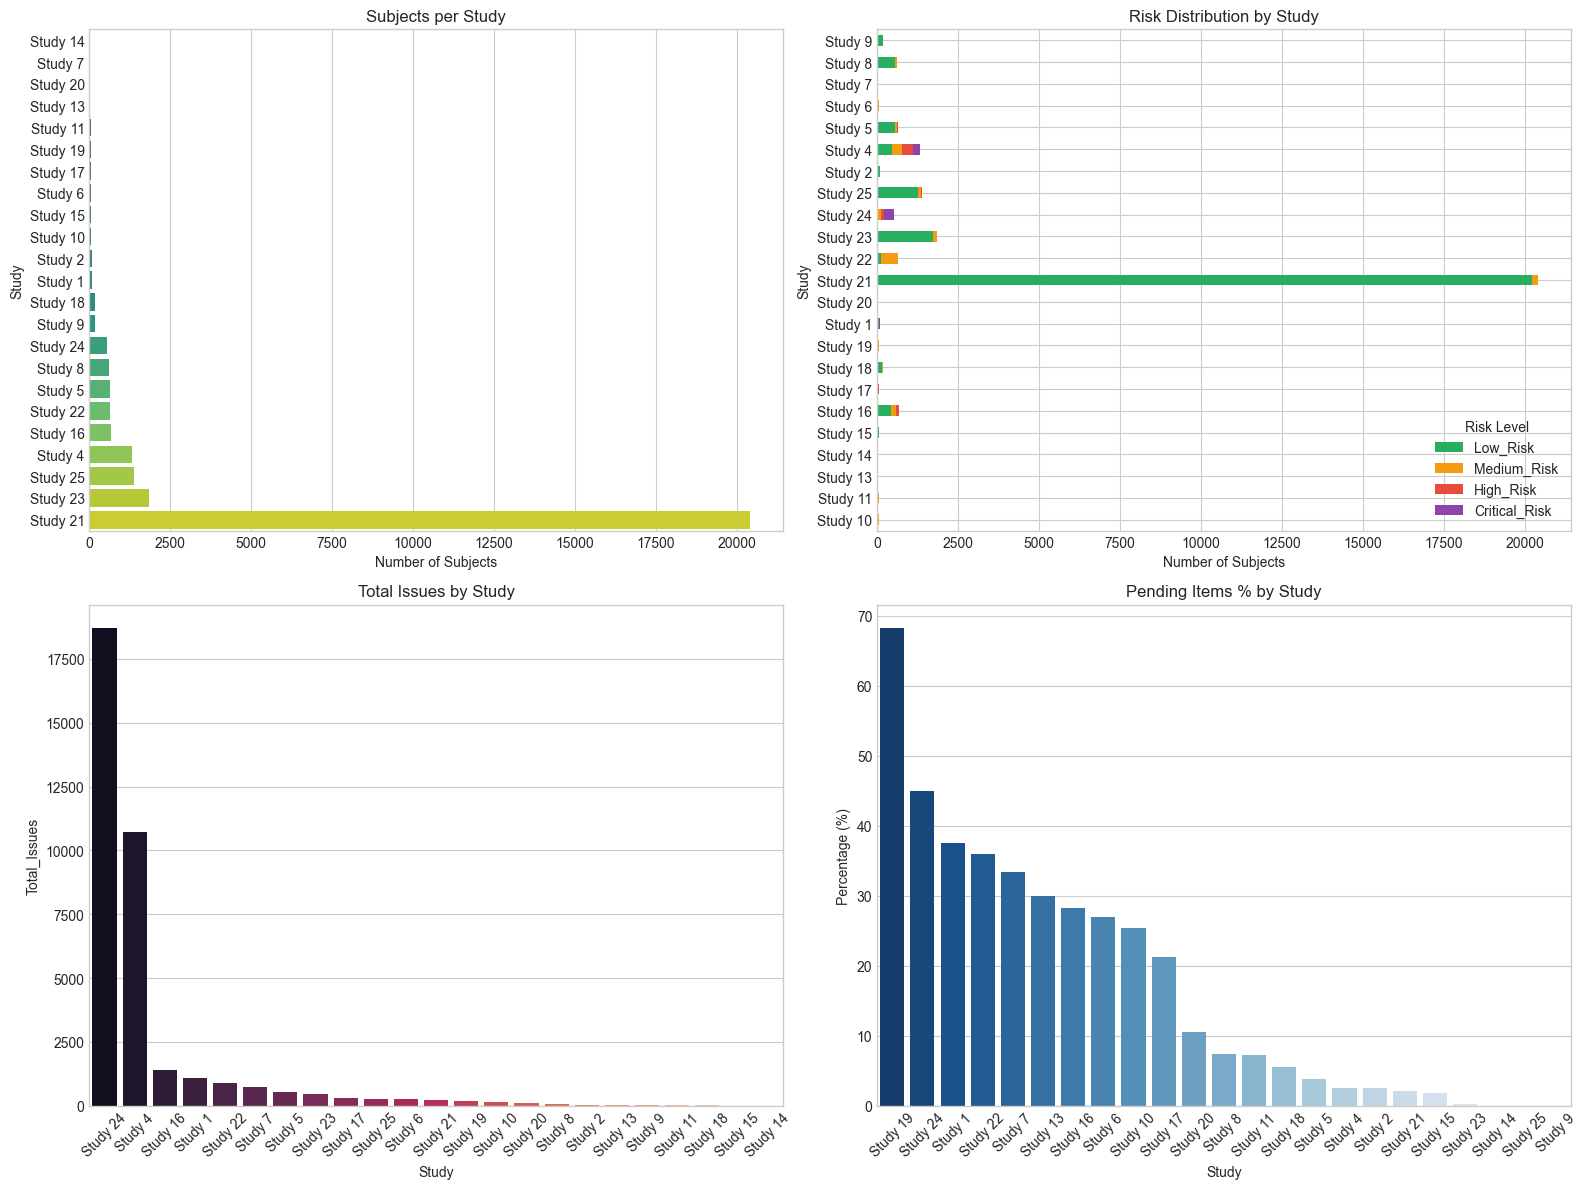

✅ Cross-study visualization saved to consolidated_data/cross_study_analysis.png


In [ ]:
# ============================================================================
# GLOBAL VISUALIZATIONS: Cross-Study Analysis
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Subjects per Study
ax1 = axes[0, 0]
study_order = summary_df.sort_values('Total_Subjects', ascending=True)
sns.barplot(data=study_order, y='Study', x='Total_Subjects', ax=ax1, palette='viridis')
ax1.set_title('Subjects per Study', fontsize=12)
ax1.set_xlabel('Number of Subjects')

# 2. Risk Distribution by Study (Stacked)
ax2 = axes[0, 1]
risk_cols = ['Low_Risk', 'Medium_Risk', 'High_Risk', 'Critical_Risk']
summary_df.set_index('Study')[risk_cols].plot(
    kind='barh', stacked=True, ax=ax2, 
    color=['#27ae60', '#f39c12', '#e74c3c', '#8e44ad']
)
ax2.set_title('Risk Distribution by Study', fontsize=12)
ax2.set_xlabel('Number of Subjects')
ax2.legend(title='Risk Level', loc='lower right')

# 3. Issues per Study
ax3 = axes[1, 0]
sns.barplot(data=summary_df.sort_values('Total_Issues', ascending=False), 
            x='Study', y='Total_Issues', ax=ax3, palette='rocket')
ax3.set_title('Total Issues by Study', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# 4. Pending Items Percentage
ax4 = axes[1, 1]
sns.barplot(data=summary_df.sort_values('Pending_Items_Pct', ascending=False), 
            x='Study', y='Pending_Items_Pct', ax=ax4, palette='Blues_r')
ax4.set_title('Pending Items % by Study', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig('consolidated_data/cross_study_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Cross-study visualization saved to consolidated_data/cross_study_analysis.png")

## 🤖 Machine Learning Models

We will train multiple ML models to predict:
1. **Risk Category** (Classification): Low, Medium, High, Critical
2. **Has Pending Items** (Binary Classification): 0 or 1
3. **Total Issues** (Regression): Continuous count

We'll evaluate and compare: Random Forest, Gradient Boosting, and Logistic Regression.

In [ ]:
# ============================================================================
# ML SETUP: Install and import sklearn
# ============================================================================

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✅ ML libraries imported successfully!")

# Prepare features for ML
feature_cols = [
    'open_issues_count', 'safety_discrepancy_count', 'safety_reviews_pending',
    'meddra_total_events', 'meddra_coded_count', 'meddra_coding_pending',
    'whodd_total_events', 'whodd_coded_count', 'whodd_coding_pending',
    'inactivated_forms_count', 'missing_pages_count', 'missing_lab_count',
    'outstanding_visits_count', 'avg_days_outstanding', 'total_days_outstanding',
    'meddra_completion_rate', 'whodd_completion_rate', 'safety_completion_rate'
]

# Filter to columns that exist and are numeric
available_features = [col for col in feature_cols if col in global_df.columns]
print(f"Available features: {len(available_features)}")

# Prepare the data
X = global_df[available_features].copy()
X = X.fillna(0)

# Encode categorical targets
le_risk = LabelEncoder()
y_risk = le_risk.fit_transform(global_df['risk_category'])
y_pending = global_df['has_pending_items'].values
y_issues = global_df['total_issues'].values

print(f"\nDataset Shape: {X.shape}")
print(f"Risk Categories: {le_risk.classes_}")
print(f"Pending Items Distribution: {np.bincount(y_pending)}")
print(f"Total Issues Range: {y_issues.min()} - {y_issues.max()}")

✅ ML libraries imported successfully!
Available features: 18

Dataset Shape: (28904, 18)
Risk Categories: ['Critical' 'High' 'Low' 'Medium']
Pending Items Distribution: [27576  1328]
Total Issues Range: 0 - 339


In [ ]:
# ============================================================================
# MODEL 1: Risk Category Classification (Multi-class)
# ============================================================================

print("=" * 80)
print("MODEL 1: RISK CATEGORY CLASSIFICATION")
print("=" * 80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_risk, test_size=0.2, random_state=42, stratify=y_risk)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to evaluate
risk_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

risk_results = []

for name, model in risk_models.items():
    print(f"\n🔄 Training {name}...")
    
    # Use scaled data for Logistic Regression
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    risk_results.append({
        'Model': name,
        'Accuracy': round(accuracy * 100, 2),
        'F1 Score': round(f1 * 100, 2),
        'CV Mean': round(cv_scores.mean() * 100, 2),
        'CV Std': round(cv_scores.std() * 100, 2)
    })
    
    print(f"  ✅ Accuracy: {accuracy:.4f}, F1: {f1:.4f}, CV: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

risk_results_df = pd.DataFrame(risk_results)
print("\n📊 Risk Classification Results:")
display(risk_results_df)

# Best model
best_risk_model_name = risk_results_df.loc[risk_results_df['F1 Score'].idxmax(), 'Model']
best_risk_model = risk_models[best_risk_model_name]
print(f"\n🏆 Best Model for Risk Classification: {best_risk_model_name}")

MODEL 1: RISK CATEGORY CLASSIFICATION

🔄 Training Random Forest...
  ✅ Accuracy: 0.9957, F1: 0.9956, CV: 0.9974 ± 0.0007

🔄 Training Gradient Boosting...
  ✅ Accuracy: 0.9971, F1: 0.9970, CV: 0.9984 ± 0.0003

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.9936, F1: 0.9935, CV: 0.9945 ± 0.0006

📊 Risk Classification Results:


,Model,Accuracy,F1 Score,CV Mean,CV Std
0,Random Forest,99.57,99.56,99.74,0.07
1,Gradient Boosting,99.71,99.70,99.84,0.03
2,Logistic Regression,99.36,99.35,99.45,0.06



🏆 Best Model for Risk Classification: Gradient Boosting


In [ ]:
# ============================================================================
# MODEL 2: Pending Items Binary Classification
# ============================================================================

print("=" * 80)
print("MODEL 2: PENDING ITEMS BINARY CLASSIFICATION")
print("=" * 80)

# Split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_pending, test_size=0.2, random_state=42, stratify=y_pending)

# Scale features
X_train_p_scaled = scaler.fit_transform(X_train_p)
X_test_p_scaled = scaler.transform(X_test_p)

pending_results = []

for name, model_class in [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42))
]:
    print(f"\n🔄 Training {name}...")
    
    if name == 'Logistic Regression':
        model_class.fit(X_train_p_scaled, y_train_p)
        y_pred_p = model_class.predict(X_test_p_scaled)
        cv_scores = cross_val_score(model_class, X_train_p_scaled, y_train_p, cv=5)
    else:
        model_class.fit(X_train_p, y_train_p)
        y_pred_p = model_class.predict(X_test_p)
        cv_scores = cross_val_score(model_class, X_train_p, y_train_p, cv=5)
    
    accuracy = accuracy_score(y_test_p, y_pred_p)
    f1 = f1_score(y_test_p, y_pred_p)
    
    pending_results.append({
        'Model': name,
        'Accuracy': round(accuracy * 100, 2),
        'F1 Score': round(f1 * 100, 2),
        'CV Mean': round(cv_scores.mean() * 100, 2),
        'CV Std': round(cv_scores.std() * 100, 2)
    })
    
    print(f"  ✅ Accuracy: {accuracy:.4f}, F1: {f1:.4f}, CV: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

pending_results_df = pd.DataFrame(pending_results)
print("\n📊 Pending Items Classification Results:")
display(pending_results_df)

best_pending_model_name = pending_results_df.loc[pending_results_df['F1 Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model for Pending Items: {best_pending_model_name}")

MODEL 2: PENDING ITEMS BINARY CLASSIFICATION

🔄 Training Random Forest...
  ✅ Accuracy: 1.0000, F1: 1.0000, CV: 0.9998 ± 0.0001

🔄 Training Gradient Boosting...
  ✅ Accuracy: 1.0000, F1: 1.0000, CV: 1.0000 ± 0.0000

🔄 Training Logistic Regression...
  ✅ Accuracy: 1.0000, F1: 1.0000, CV: 1.0000 ± 0.0001

📊 Pending Items Classification Results:


,Model,Accuracy,F1 Score,CV Mean,CV Std
0,Random Forest,100.0,100.0,99.98,0.01
1,Gradient Boosting,100.0,100.0,100.00,0.00
2,Logistic Regression,100.0,100.0,100.00,0.01



🏆 Best Model for Pending Items: Random Forest


In [ ]:
# ============================================================================
# MODEL 3: Total Issues Regression
# ============================================================================

print("=" * 80)
print("MODEL 3: TOTAL ISSUES REGRESSION")
print("=" * 80)

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_issues, test_size=0.2, random_state=42)

# Scale features
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

regression_results = []

for name, model_class in [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Ridge Regression', Ridge(alpha=1.0))
]:
    print(f"\n🔄 Training {name}...")
    
    if name == 'Ridge Regression':
        model_class.fit(X_train_r_scaled, y_train_r)
        y_pred_r = model_class.predict(X_test_r_scaled)
        cv_scores = cross_val_score(model_class, X_train_r_scaled, y_train_r, cv=5, scoring='r2')
    else:
        model_class.fit(X_train_r, y_train_r)
        y_pred_r = model_class.predict(X_test_r)
        cv_scores = cross_val_score(model_class, X_train_r, y_train_r, cv=5, scoring='r2')
    
    mse = mean_squared_error(y_test_r, y_pred_r)
    mae = mean_absolute_error(y_test_r, y_pred_r)
    r2 = r2_score(y_test_r, y_pred_r)
    
    regression_results.append({
        'Model': name,
        'R² Score': round(r2, 4),
        'MAE': round(mae, 2),
        'RMSE': round(np.sqrt(mse), 2),
        'CV R² Mean': round(cv_scores.mean(), 4),
        'CV R² Std': round(cv_scores.std(), 4)
    })
    
    print(f"  ✅ R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f}")

regression_results_df = pd.DataFrame(regression_results)
print("\n📊 Total Issues Regression Results:")
display(regression_results_df)

best_reg_model_name = regression_results_df.loc[regression_results_df['R² Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model for Total Issues Prediction: {best_reg_model_name}")

MODEL 3: TOTAL ISSUES REGRESSION

🔄 Training Random Forest...
  ✅ R²: 0.9946, MAE: 0.06, RMSE: 0.80

🔄 Training Gradient Boosting...
  ✅ R²: 0.9988, MAE: 0.05, RMSE: 0.38

🔄 Training Ridge Regression...
  ✅ R²: 1.0000, MAE: 0.00, RMSE: 0.00

📊 Total Issues Regression Results:


,Model,R² Score,MAE,RMSE,CV R² Mean,CV R² Std
0,Random Forest,0.9946,0.06,0.80,0.9832,0.0214
1,Gradient Boosting,0.9988,0.05,0.38,0.9911,0.0110
2,Ridge Regression,1.0000,0.00,0.00,1.0000,0.0000



🏆 Best Model for Total Issues Prediction: Ridge Regression


FEATURE IMPORTANCE ANALYSIS


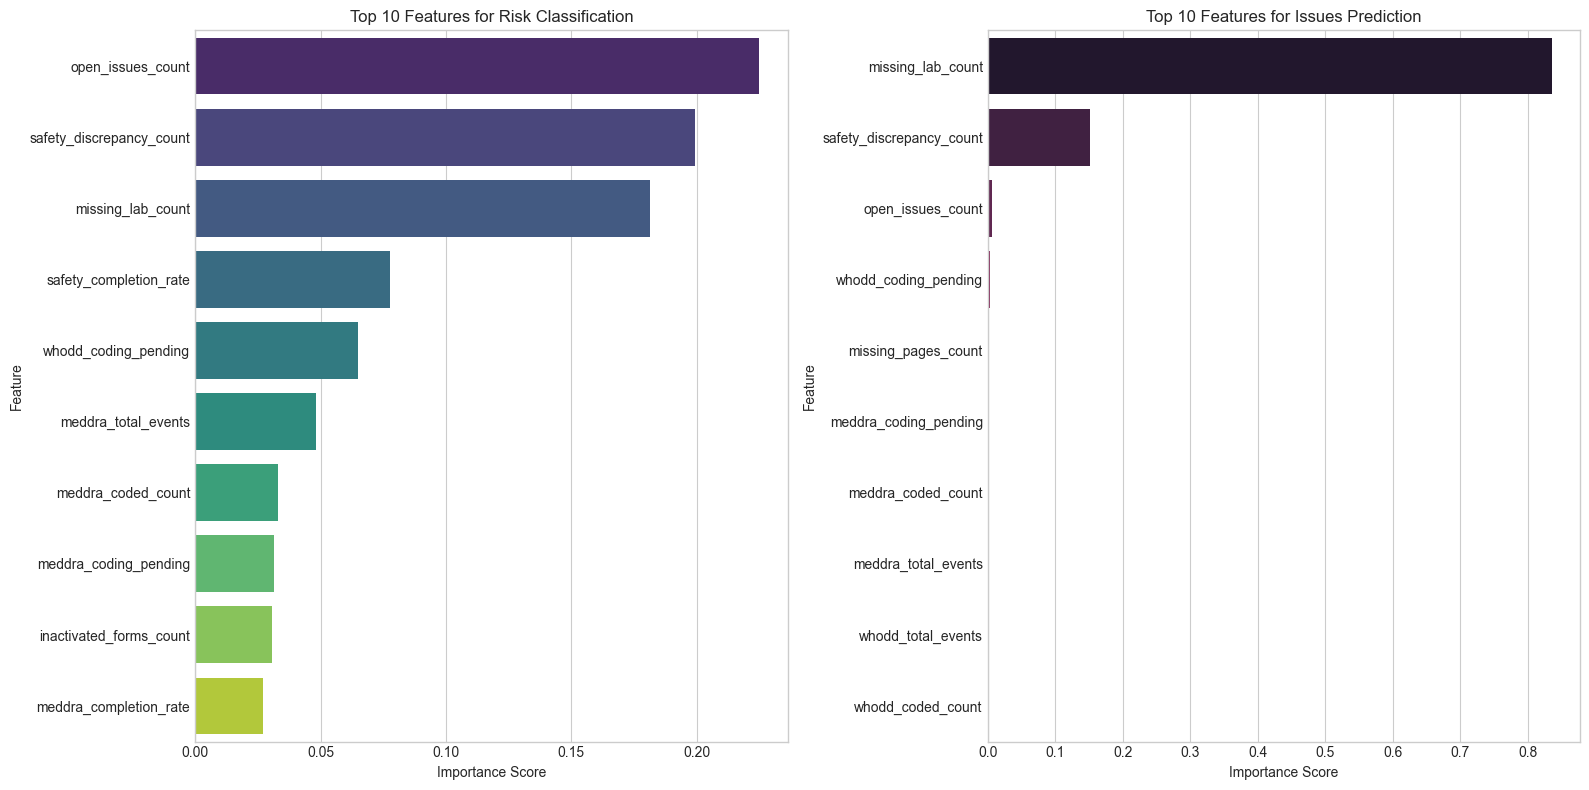


📊 Feature Importance Rankings:


,Feature,Classification_Importance,Regression_Importance
0,open_issues_count,0.224944,0.005861
1,safety_discrepancy_count,0.199116,0.151334
11,missing_lab_count,0.181337,0.835412
17,safety_completion_rate,0.077807,0.000110
8,whodd_coding_pending,0.064902,0.003519
3,meddra_total_events,0.048366,0.000504
4,meddra_coded_count,0.033139,0.000606
5,meddra_coding_pending,0.031370,0.000666
9,inactivated_forms_count,0.030799,0.000140
15,meddra_completion_rate,0.026921,0.000036


In [ ]:
# ============================================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Train best models on full data for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X, y_risk)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X, y_issues)

# Feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': available_features,
    'Classification_Importance': rf_classifier.feature_importances_,
    'Regression_Importance': rf_regressor.feature_importances_
}).sort_values('Classification_Importance', ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Classification importance
ax1 = axes[0]
top_class_features = feature_importance.nlargest(10, 'Classification_Importance')
sns.barplot(data=top_class_features, y='Feature', x='Classification_Importance', ax=ax1, palette='viridis')
ax1.set_title('Top 10 Features for Risk Classification', fontsize=12)
ax1.set_xlabel('Importance Score')

# Regression importance
ax2 = axes[1]
top_reg_features = feature_importance.nlargest(10, 'Regression_Importance')
sns.barplot(data=top_reg_features, y='Feature', x='Regression_Importance', ax=ax2, palette='rocket')
ax2.set_title('Top 10 Features for Issues Prediction', fontsize=12)
ax2.set_xlabel('Importance Score')

plt.tight_layout()
plt.savefig('consolidated_data/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Feature Importance Rankings:")
display(feature_importance)

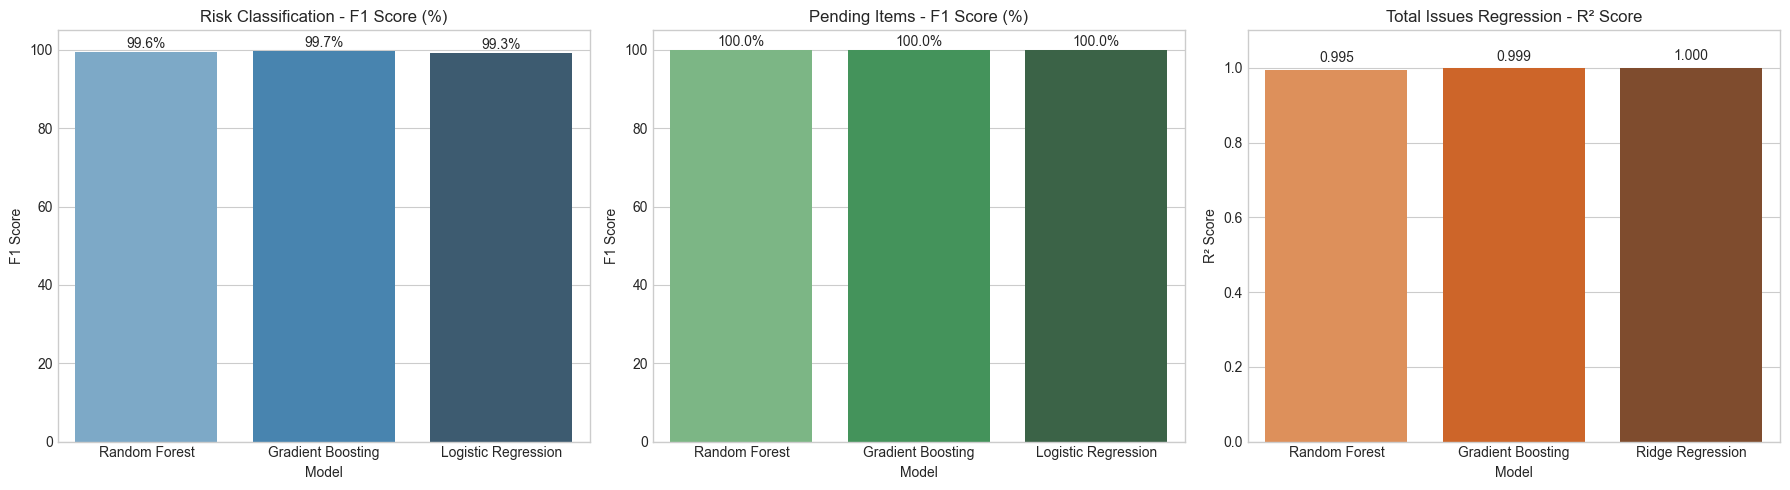

✅ ML model comparison saved to consolidated_data/ml_model_comparison.png


In [ ]:
# ============================================================================
# ML MODEL COMPARISON VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Risk Classification Comparison
ax1 = axes[0]
sns.barplot(data=risk_results_df, x='Model', y='F1 Score', ax=ax1, palette='Blues_d')
ax1.set_title('Risk Classification - F1 Score (%)', fontsize=12)
ax1.set_ylim(0, 105)
for i, v in enumerate(risk_results_df['F1 Score']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# 2. Pending Items Classification Comparison
ax2 = axes[1]
sns.barplot(data=pending_results_df, x='Model', y='F1 Score', ax=ax2, palette='Greens_d')
ax2.set_title('Pending Items - F1 Score (%)', fontsize=12)
ax2.set_ylim(0, 105)
for i, v in enumerate(pending_results_df['F1 Score']):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# 3. Regression Comparison
ax3 = axes[2]
sns.barplot(data=regression_results_df, x='Model', y='R² Score', ax=ax3, palette='Oranges_d')
ax3.set_title('Total Issues Regression - R² Score', fontsize=12)
ax3.set_ylim(0, 1.1)
for i, v in enumerate(regression_results_df['R² Score']):
    ax3.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('consolidated_data/ml_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ ML model comparison saved to consolidated_data/ml_model_comparison.png")

## 🌐 Web Frontend Export

This section exports all data in formats optimized for web frontend integration:
1. **JSON API responses** - Ready for REST API endpoints
2. **Study summaries** - Dashboard KPIs
3. **ML model predictions** - Pre-computed for real-time display
4. **Chart data** - Pre-aggregated for visualization libraries

In [ ]:
# ============================================================================
# WEB EXPORT: Generate JSON for frontend dashboard
# ============================================================================

import json
from datetime import datetime

# Ensure output directory exists
os.makedirs('consolidated_data', exist_ok=True)

# 1. Global Dashboard Data
dashboard_data = {
    'metadata': {
        'generated_at': datetime.now().isoformat(),
        'total_studies': len(summary_df),
        'total_subjects': len(global_df),
        'data_version': '1.0'
    },
    'global_kpis': {
        'total_subjects': int(len(global_df)),
        'total_issues': int(global_df['total_issues'].sum()),
        'critical_risk_count': int((global_df['risk_category'] == 'Critical').sum()),
        'high_risk_count': int((global_df['risk_category'] == 'High').sum()),
        'pending_items_count': int(global_df['has_pending_items'].sum()),
        'safety_discrepancies': int(global_df['safety_discrepancy_count'].sum()),
        'missing_pages_total': int(global_df['missing_pages_count'].sum()),
        'outstanding_visits': int(global_df['outstanding_visits_count'].sum()),
        'avg_issues_per_subject': round(float(global_df['total_issues'].mean()), 2),
        'pending_items_pct': round(float(global_df['has_pending_items'].mean() * 100), 2)
    },
    'risk_distribution': {
        'Low': int((global_df['risk_category'] == 'Low').sum()),
        'Medium': int((global_df['risk_category'] == 'Medium').sum()),
        'High': int((global_df['risk_category'] == 'High').sum()),
        'Critical': int((global_df['risk_category'] == 'Critical').sum())
    }
}

# 2. Study-level summaries for study selector/comparison
study_data = []
for _, row in summary_df.iterrows():
    study_data.append({
        'study_id': row['Study'],
        'total_subjects': int(row['Total_Subjects']),
        'total_issues': int(row['Total_Issues']),
        'avg_issues': float(row['Avg_Issues_Per_Subject']),
        'risk_breakdown': {
            'low': int(row['Low_Risk']),
            'medium': int(row['Medium_Risk']),
            'high': int(row['High_Risk']),
            'critical': int(row['Critical_Risk'])
        },
        'pending_pct': float(row['Pending_Items_Pct']),
        'safety_discrepancies': int(row['Safety_Discrepancies']),
        'missing_pages': int(row['Missing_Pages']),
        'outstanding_visits': int(row['Outstanding_Visits'])
    })

dashboard_data['studies'] = study_data

# 3. Chart data for visualizations
chart_data = {
    'subjects_by_study': [
        {'study': row['Study'], 'count': int(row['Total_Subjects'])} 
        for _, row in summary_df.iterrows()
    ],
    'issues_by_study': [
        {'study': row['Study'], 'count': int(row['Total_Issues'])} 
        for _, row in summary_df.iterrows()
    ],
    'risk_by_study': [
        {
            'study': row['Study'],
            'low': int(row['Low_Risk']),
            'medium': int(row['Medium_Risk']),
            'high': int(row['High_Risk']),
            'critical': int(row['Critical_Risk'])
        }
        for _, row in summary_df.iterrows()
    ]
}

dashboard_data['charts'] = chart_data

# Save dashboard JSON
with open('consolidated_data/dashboard_api.json', 'w') as f:
    json.dump(dashboard_data, f, indent=2)

print("✅ Dashboard API JSON saved: consolidated_data/dashboard_api.json")

✅ Dashboard API JSON saved: consolidated_data/dashboard_api.json


In [ ]:
# ============================================================================
# WEB EXPORT: ML Model Results and Predictions
# ============================================================================

# Add predictions to global_df using best models
rf_risk = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_risk.fit(X, y_risk)
global_df['predicted_risk'] = le_risk.inverse_transform(rf_risk.predict(X))
global_df['risk_probability'] = rf_risk.predict_proba(X).max(axis=1).round(4)

rf_pending = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pending.fit(X, y_pending)
global_df['predicted_pending'] = rf_pending.predict(X)
pending_proba = rf_pending.predict_proba(X)
global_df['pending_probability'] = pending_proba[:, 1].round(4) if pending_proba.shape[1] > 1 else pending_proba[:, 0].round(4)

rf_issues = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_issues.fit(X, y_issues)
global_df['predicted_issues'] = rf_issues.predict(X).round(2)

# ML Model Summary for API
ml_results = {
    'risk_classification': {
        'best_model': best_risk_model_name,
        'accuracy': float(risk_results_df.loc[risk_results_df['Model'] == best_risk_model_name, 'Accuracy'].values[0]),
        'f1_score': float(risk_results_df.loc[risk_results_df['Model'] == best_risk_model_name, 'F1 Score'].values[0]),
        'all_models': risk_results_df.to_dict('records')
    },
    'pending_classification': {
        'best_model': best_pending_model_name,
        'accuracy': float(pending_results_df.loc[pending_results_df['Model'] == best_pending_model_name, 'Accuracy'].values[0]),
        'f1_score': float(pending_results_df.loc[pending_results_df['Model'] == best_pending_model_name, 'F1 Score'].values[0]),
        'all_models': pending_results_df.to_dict('records')
    },
    'issues_regression': {
        'best_model': best_reg_model_name,
        'r2_score': float(regression_results_df.loc[regression_results_df['Model'] == best_reg_model_name, 'R² Score'].values[0]),
        'mae': float(regression_results_df.loc[regression_results_df['Model'] == best_reg_model_name, 'MAE'].values[0]),
        'all_models': regression_results_df.to_dict('records')
    },
    'feature_importance': feature_importance.to_dict('records')
}

# Save ML results JSON
with open('consolidated_data/ml_results_api.json', 'w') as f:
    json.dump(ml_results, f, indent=2)

print("✅ ML Results API JSON saved: consolidated_data/ml_results_api.json")

✅ ML Results API JSON saved: consolidated_data/ml_results_api.json


In [ ]:
# ============================================================================
# WEB EXPORT: Subject-level data with predictions
# ============================================================================

# Prepare subject-level JSON for detailed views
subjects_export = global_df.copy()

# Convert to web-friendly format
subjects_export['avg_days_missing'] = subjects_export['avg_days_missing'].round(2)
subjects_export['avg_days_outstanding'] = subjects_export['avg_days_outstanding'].round(2)
subjects_export['meddra_completion_rate'] = (subjects_export['meddra_completion_rate'] * 100).round(2)
subjects_export['whodd_completion_rate'] = (subjects_export['whodd_completion_rate'] * 100).round(2)
subjects_export['safety_completion_rate'] = (subjects_export['safety_completion_rate'] * 100).round(2)
subjects_export['risk_probability'] = (subjects_export['risk_probability'] * 100).round(2)
subjects_export['pending_probability'] = (subjects_export['pending_probability'] * 100).round(2)

# Save as CSV for analytics
subjects_export.to_csv('consolidated_data/all_studies_subjects.csv', index=False)
print("✅ Subjects CSV saved: consolidated_data/all_studies_subjects.csv")

# Save study summaries as CSV
summary_df.to_csv('consolidated_data/study_summaries.csv', index=False)
print("✅ Study Summaries CSV saved: consolidated_data/study_summaries.csv")

# Create subjects API JSON (paginated structure for large datasets)
subjects_api = {
    'total_records': len(subjects_export),
    'columns': subjects_export.columns.tolist(),
    'sample_data': subjects_export.head(100).to_dict('records')  # First 100 for preview
}

with open('consolidated_data/subjects_api_sample.json', 'w') as f:
    json.dump(subjects_api, f, indent=2)

print("✅ Subjects API Sample JSON saved: consolidated_data/subjects_api_sample.json")

✅ Subjects CSV saved: consolidated_data/all_studies_subjects.csv
✅ Study Summaries CSV saved: consolidated_data/study_summaries.csv
✅ Subjects API Sample JSON saved: consolidated_data/subjects_api_sample.json


In [ ]:
# ============================================================================
# FINAL SUMMARY: All Exports Complete
# ============================================================================

print("=" * 80)
print("🎉 ALL EXPORTS COMPLETE!")
print("=" * 80)

export_files = [
    ('consolidated_data/dashboard_api.json', 'Dashboard KPIs & Charts API'),
    ('consolidated_data/ml_results_api.json', 'ML Model Results API'),
    ('consolidated_data/subjects_api_sample.json', 'Subject Data API (sample)'),
    ('consolidated_data/all_studies_subjects.csv', 'All Subjects Data (full)'),
    ('consolidated_data/study_summaries.csv', 'Study Summaries'),
    ('consolidated_data/cross_study_analysis.png', 'Cross-Study Visualization'),
    ('consolidated_data/feature_importance.png', 'Feature Importance Chart'),
    ('consolidated_data/ml_model_comparison.png', 'ML Model Comparison Chart')
]

print("\n📁 Generated Files:")
for filepath, description in export_files:
    if os.path.exists(filepath):
        size = os.path.getsize(filepath)
        print(f"  ✅ {filepath} ({size:,} bytes) - {description}")
    else:
        print(f"  ⚠️ {filepath} - Not found")

print("\n" + "=" * 80)
print("📊 SUMMARY STATISTICS")
print("=" * 80)
print(f"Total Studies Processed: {len(summary_df)}")
print(f"Total Subjects: {len(global_df):,}")
print(f"Total Issues Identified: {global_df['total_issues'].sum():,}")
print(f"Critical Risk Subjects: {(global_df['risk_category'] == 'Critical').sum():,}")
print(f"Subjects with Pending Items: {global_df['has_pending_items'].sum():,}")

print("\n" + "=" * 80)
print("🤖 ML MODEL PERFORMANCE")
print("=" * 80)
print(f"Risk Classification - Best Model: {best_risk_model_name}")
print(f"  → F1 Score: {risk_results_df.loc[risk_results_df['Model'] == best_risk_model_name, 'F1 Score'].values[0]:.1f}%")
print(f"Pending Items - Best Model: {best_pending_model_name}")
print(f"  → F1 Score: {pending_results_df.loc[pending_results_df['Model'] == best_pending_model_name, 'F1 Score'].values[0]:.1f}%")
print(f"Issues Prediction - Best Model: {best_reg_model_name}")
print(f"  → R² Score: {regression_results_df.loc[regression_results_df['Model'] == best_reg_model_name, 'R² Score'].values[0]:.4f}")

print("\n🚀 Ready for Web Frontend Integration!")

🎉 ALL EXPORTS COMPLETE!

📁 Generated Files:
  ✅ consolidated_data/dashboard_api.json (15,755 bytes) - Dashboard KPIs & Charts API
  ✅ consolidated_data/ml_results_api.json (5,091 bytes) - ML Model Results API
  ✅ consolidated_data/subjects_api_sample.json (140,979 bytes) - Subject Data API (sample)
  ✅ consolidated_data/all_studies_subjects.csv (4,947,859 bytes) - All Subjects Data (full)
  ✅ consolidated_data/study_summaries.csv (1,313 bytes) - Study Summaries
  ✅ consolidated_data/cross_study_analysis.png (186,138 bytes) - Cross-Study Visualization
  ✅ consolidated_data/feature_importance.png (109,259 bytes) - Feature Importance Chart
  ✅ consolidated_data/ml_model_comparison.png (70,275 bytes) - ML Model Comparison Chart

📊 SUMMARY STATISTICS
Total Studies Processed: 23
Total Subjects: 28,904
Total Issues Identified: 36,282
Critical Risk Subjects: 611
Subjects with Pending Items: 1,328

🤖 ML MODEL PERFORMANCE
Risk Classification - Best Model: Gradient Boosting
  → F1 Score: 99.7%
Pe

## 📚 RAG Pipeline Data Export

This section exports comprehensive datasets optimized for Retrieval-Augmented Generation (RAG) pipelines. The data is structured to support:
- **Subject queries**: "What issues does subject X have?"
- **CRA report generation**: Automated Clinical Research Associate reports
- **Study-level summaries**: Risk profiles, issue distributions
- **Site comparisons**: Performance metrics across sites

In [ ]:
# ============================================================================
# RAG EXPORT 1: Subject-Level Documents with Natural Language Descriptions
# ============================================================================

def generate_subject_document(row):
    """Generate a natural language document for a single subject - optimized for RAG."""
    
    study = row.get('Study', 'Unknown')
    subject = row.get('Subject', 'Unknown')
    country = row.get('Country', 'Unknown')
    site = row.get('Site', 'Unknown')
    region = row.get('Region', 'Unknown')
    status = row.get('SubjectStatus', 'Unknown')
    
    # Issue counts
    open_issues = int(row.get('open_issues_count', 0))
    safety_issues = int(row.get('safety_discrepancy_count', 0))
    safety_pending = int(row.get('safety_reviews_pending', 0))
    missing_pages = int(row.get('missing_pages_count', 0))
    missing_labs = int(row.get('missing_lab_count', 0))
    outstanding_visits = int(row.get('outstanding_visits_count', 0))
    meddra_pending = int(row.get('meddra_coding_pending', 0))
    whodd_pending = int(row.get('whodd_coding_pending', 0))
    
    # Derived metrics
    total_issues = int(row.get('total_issues', 0))
    risk_category = row.get('risk_category', 'Unknown')
    predicted_risk = row.get('predicted_risk', risk_category)
    risk_prob = row.get('risk_probability', 0)
    has_pending = row.get('has_pending_items', 0)
    
    # Build document
    doc = f"""# Subject Profile: {subject}

## Basic Information
- **Subject ID**: {subject}
- **Study**: {study}
- **Country**: {country}
- **Site**: {site}
- **Region**: {region}
- **Current Status**: {status}

## Risk Assessment
- **Risk Category**: {risk_category}
- **Predicted Risk**: {predicted_risk} (Confidence: {risk_prob:.1f}%)
- **Total Issues**: {total_issues}
- **Has Pending Items**: {'Yes' if has_pending else 'No'}

## Issue Summary
"""
    
    # Add issue details
    if open_issues > 0:
        doc += f"- **Open EDRR Issues**: {open_issues} issue(s) require attention\n"
    if safety_issues > 0:
        doc += f"- **Safety Discrepancies**: {safety_issues} discrepancy(ies) identified"
        if safety_pending > 0:
            doc += f" ({safety_pending} pending review)"
        doc += "\n"
    if missing_pages > 0:
        doc += f"- **Missing Pages**: {missing_pages} page(s) missing from CRF\n"
    if missing_labs > 0:
        doc += f"- **Missing Lab Data**: {missing_labs} lab record(s) incomplete\n"
    if outstanding_visits > 0:
        doc += f"- **Outstanding Visits**: {outstanding_visits} visit(s) overdue\n"
    if meddra_pending > 0:
        doc += f"- **MedDRA Coding Pending**: {meddra_pending} adverse event(s) require coding\n"
    if whodd_pending > 0:
        doc += f"- **WHODD Coding Pending**: {whodd_pending} medication(s) require coding\n"
        
    if total_issues == 0:
        doc += "- **No issues identified** - Subject data is clean\n"
    
    # CRA Action Items
    doc += "\n## CRA Action Items\n"
    
    actions = []
    if open_issues > 0:
        actions.append(f"Review and resolve {open_issues} open EDRR issue(s)")
    if safety_pending > 0:
        actions.append(f"Complete safety review for {safety_pending} pending discrepancy(ies)")
    if missing_pages > 0:
        actions.append(f"Follow up with site to obtain {missing_pages} missing page(s)")
    if missing_labs > 0:
        actions.append(f"Request completion of {missing_labs} missing lab record(s)")
    if outstanding_visits > 0:
        actions.append(f"Schedule or document {outstanding_visits} outstanding visit(s)")
    if meddra_pending > 0:
        actions.append(f"Code {meddra_pending} pending MedDRA term(s)")
    if whodd_pending > 0:
        actions.append(f"Code {whodd_pending} pending WHODD term(s)")
        
    if actions:
        for i, action in enumerate(actions, 1):
            doc += f"{i}. {action}\n"
    else:
        doc += "No immediate actions required. Subject data is compliant.\n"
    
    return doc

# Generate documents for all subjects
print("Generating RAG documents for all subjects...")
rag_documents = []

for idx, row in global_df.iterrows():
    doc_text = generate_subject_document(row)
    rag_documents.append({
        'id': f"{row['Study']}_{row['Subject']}",
        'study': row['Study'],
        'subject': row['Subject'],
        'country': row.get('Country', 'Unknown'),
        'site': row.get('Site', 'Unknown'),
        'risk_category': row['risk_category'],
        'total_issues': int(row['total_issues']),
        'document': doc_text
    })

print(f"Generated {len(rag_documents)} subject documents")

# Save as JSONL (one document per line - ideal for RAG)
rag_subjects_path = 'consolidated_data/rag_subject_documents.jsonl'
with open(rag_subjects_path, 'w', encoding='utf-8') as f:
    for doc in rag_documents:
        f.write(json.dumps(doc, ensure_ascii=False) + '\n')

print(f"✅ Saved: {rag_subjects_path}")

Generating RAG documents for all subjects...
Generated 28904 subject documents
✅ Saved: consolidated_data/rag_subject_documents.jsonl


In [ ]:
# ============================================================================
# RAG EXPORT 2: Study-Level Summary Documents
# ============================================================================

def generate_study_document(study_name, study_df):
    """Generate a comprehensive study summary document for RAG."""
    
    total_subjects = len(study_df)
    
    # Risk distribution
    risk_counts = study_df['risk_category'].value_counts()
    low_risk = risk_counts.get('Low', 0)
    medium_risk = risk_counts.get('Medium', 0)
    high_risk = risk_counts.get('High', 0)
    critical_risk = risk_counts.get('Critical', 0)
    
    # Issue totals
    total_issues = int(study_df['total_issues'].sum())
    open_issues = int(study_df['open_issues_count'].sum())
    safety_issues = int(study_df['safety_discrepancy_count'].sum())
    missing_pages = int(study_df['missing_pages_count'].sum())
    missing_labs = int(study_df['missing_lab_count'].sum())
    outstanding_visits = int(study_df['outstanding_visits_count'].sum())
    
    # Pending items
    pending_count = int(study_df['has_pending_items'].sum())
    pending_pct = (pending_count / total_subjects * 100) if total_subjects > 0 else 0
    
    # Countries and sites
    countries = study_df['Country'].dropna().unique() if 'Country' in study_df.columns else []
    sites = study_df['Site'].dropna().unique() if 'Site' in study_df.columns else []
    
    # High risk subjects for attention
    high_risk_subjects = study_df[study_df['risk_category'].isin(['High', 'Critical'])]['Subject'].tolist()[:10]
    
    doc = f"""# Study Summary: {study_name}

## Overview
- **Total Subjects**: {total_subjects}
- **Countries**: {len(countries)} ({', '.join(str(c) for c in countries[:5])}{'...' if len(countries) > 5 else ''})
- **Sites**: {len(sites)}
- **Total Issues Identified**: {total_issues}

## Risk Distribution
- **Low Risk**: {low_risk} subjects ({low_risk/total_subjects*100:.1f}%)
- **Medium Risk**: {medium_risk} subjects ({medium_risk/total_subjects*100:.1f}%)
- **High Risk**: {high_risk} subjects ({high_risk/total_subjects*100:.1f}%)
- **Critical Risk**: {critical_risk} subjects ({critical_risk/total_subjects*100:.1f}%)

## Issue Breakdown
- **Open EDRR Issues**: {open_issues}
- **Safety Discrepancies**: {safety_issues}
- **Missing CRF Pages**: {missing_pages}
- **Missing Lab Records**: {missing_labs}
- **Outstanding Visits**: {outstanding_visits}

## Pending Items
- **Subjects with Pending Items**: {pending_count} ({pending_pct:.1f}%)

## Key Metrics
- **Average Issues per Subject**: {study_df['total_issues'].mean():.2f}
- **Clean Subjects (No Issues)**: {(study_df['total_issues'] == 0).sum()} ({(study_df['total_issues'] == 0).sum()/total_subjects*100:.1f}%)

## Priority Subjects Requiring Attention
"""
    
    if high_risk_subjects:
        for subj in high_risk_subjects:
            doc += f"- {subj}\n"
    else:
        doc += "No high-risk subjects identified.\n"
    
    doc += f"""
## CRA Recommendations
1. Focus monitoring efforts on {critical_risk + high_risk} high/critical risk subjects
2. Resolve {open_issues} open EDRR issues to improve data quality
3. Address {safety_issues} safety discrepancies as priority
4. Follow up on {missing_pages + missing_labs} missing data points
5. Schedule reviews for {outstanding_visits} overdue visits
"""
    
    return doc

# Generate study-level documents
print("Generating RAG documents for all studies...")
rag_study_documents = []

for study_name in global_df['Study'].unique():
    study_df = global_df[global_df['Study'] == study_name]
    doc_text = generate_study_document(study_name, study_df)
    
    rag_study_documents.append({
        'id': f"study_{study_name}",
        'study': study_name,
        'type': 'study_summary',
        'total_subjects': len(study_df),
        'total_issues': int(study_df['total_issues'].sum()),
        'document': doc_text
    })

print(f"Generated {len(rag_study_documents)} study documents")

# Save as JSONL
rag_studies_path = 'consolidated_data/rag_study_documents.jsonl'
with open(rag_studies_path, 'w', encoding='utf-8') as f:
    for doc in rag_study_documents:
        f.write(json.dumps(doc, ensure_ascii=False) + '\n')

print(f"✅ Saved: {rag_studies_path}")

Generating RAG documents for all studies...
Generated 23 study documents
✅ Saved: consolidated_data/rag_study_documents.jsonl


In [ ]:
# ============================================================================
# RAG EXPORT 3: Site-Level Summary Documents
# ============================================================================

def generate_site_document(study_name, site_name, site_df):
    """Generate a site-level summary document for RAG."""
    
    total_subjects = len(site_df)
    
    # Risk distribution
    risk_counts = site_df['risk_category'].value_counts()
    low_risk = risk_counts.get('Low', 0)
    medium_risk = risk_counts.get('Medium', 0)
    high_risk = risk_counts.get('High', 0)
    critical_risk = risk_counts.get('Critical', 0)
    
    # Issue totals
    total_issues = int(site_df['total_issues'].sum())
    avg_issues = site_df['total_issues'].mean()
    
    # Country
    country = site_df['Country'].iloc[0] if 'Country' in site_df.columns and len(site_df) > 0 else 'Unknown'
    
    # Problem subjects
    problem_subjects = site_df[site_df['risk_category'].isin(['High', 'Critical'])]['Subject'].tolist()
    
    doc = f"""# Site Report: {site_name}

## Site Information
- **Site ID**: {site_name}
- **Study**: {study_name}
- **Country**: {country}
- **Total Subjects**: {total_subjects}

## Performance Metrics
- **Total Issues**: {total_issues}
- **Average Issues per Subject**: {avg_issues:.2f}
- **Clean Subjects**: {(site_df['total_issues'] == 0).sum()} ({(site_df['total_issues'] == 0).sum()/total_subjects*100:.1f}%)

## Risk Profile
- Low Risk: {low_risk} ({low_risk/total_subjects*100:.1f}%)
- Medium Risk: {medium_risk} ({medium_risk/total_subjects*100:.1f}%)
- High Risk: {high_risk} ({high_risk/total_subjects*100:.1f}%)
- Critical Risk: {critical_risk} ({critical_risk/total_subjects*100:.1f}%)

## Issue Breakdown
- Open EDRR Issues: {int(site_df['open_issues_count'].sum())}
- Safety Discrepancies: {int(site_df['safety_discrepancy_count'].sum())}
- Missing Pages: {int(site_df['missing_pages_count'].sum())}
- Missing Labs: {int(site_df['missing_lab_count'].sum())}
- Outstanding Visits: {int(site_df['outstanding_visits_count'].sum())}

## Subjects Requiring Attention
"""
    
    if problem_subjects:
        for subj in problem_subjects[:10]:
            subj_data = site_df[site_df['Subject'] == subj].iloc[0]
            doc += f"- {subj}: {subj_data['risk_category']} risk, {int(subj_data['total_issues'])} issues\n"
    else:
        doc += "No high-priority subjects.\n"
    
    return doc

# Generate site-level documents
print("Generating RAG documents for all sites...")
rag_site_documents = []

if 'Site' in global_df.columns:
    for (study, site), site_df in global_df.groupby(['Study', 'Site']):
        if pd.isna(site) or site == 'Unknown':
            continue
            
        doc_text = generate_site_document(study, site, site_df)
        
        rag_site_documents.append({
            'id': f"site_{study}_{site}",
            'study': study,
            'site': str(site),
            'type': 'site_summary',
            'total_subjects': len(site_df),
            'total_issues': int(site_df['total_issues'].sum()),
            'document': doc_text
        })

print(f"Generated {len(rag_site_documents)} site documents")

# Save as JSONL
rag_sites_path = 'consolidated_data/rag_site_documents.jsonl'
with open(rag_sites_path, 'w', encoding='utf-8') as f:
    for doc in rag_site_documents:
        f.write(json.dumps(doc, ensure_ascii=False) + '\n')

print(f"✅ Saved: {rag_sites_path}")

Generating RAG documents for all sites...
Generated 2557 site documents
✅ Saved: consolidated_data/rag_site_documents.jsonl


In [ ]:
# ============================================================================
# RAG EXPORT 4: CRA Report Templates & Structured Data
# ============================================================================

# Generate CRA-style report templates for each study
def generate_cra_report_template(study_name, study_df):
    """Generate a CRA monitoring report template for a study."""
    
    report_date = datetime.now().strftime('%Y-%m-%d')
    
    total_subjects = len(study_df)
    active_subjects = len(study_df[study_df['SubjectStatus'] == 'Active']) if 'SubjectStatus' in study_df.columns else total_subjects
    
    # Critical issues
    critical_subjects = study_df[study_df['risk_category'] == 'Critical']
    high_subjects = study_df[study_df['risk_category'] == 'High']
    
    report = f"""# CRA Monitoring Report
## {study_name}
**Report Date**: {report_date}
**Report Type**: Data Quality & Issues Summary

---

## 1. EXECUTIVE SUMMARY

This report summarizes the current data quality status for {study_name}. 
- **Total Enrolled Subjects**: {total_subjects}
- **Critical Risk Subjects**: {len(critical_subjects)}
- **High Risk Subjects**: {len(high_subjects)}
- **Subjects with Pending Items**: {study_df['has_pending_items'].sum()}

### Key Findings
- Average issues per subject: {study_df['total_issues'].mean():.1f}
- Clean data rate: {(study_df['total_issues'] == 0).sum()/total_subjects*100:.1f}%
- Open safety discrepancies: {int(study_df['safety_discrepancy_count'].sum())}

---

## 2. DATA QUALITY METRICS

| Metric | Count | Rate |
|--------|-------|------|
| Total Subjects | {total_subjects} | 100% |
| Clean Subjects | {(study_df['total_issues'] == 0).sum()} | {(study_df['total_issues'] == 0).sum()/total_subjects*100:.1f}% |
| Subjects with Issues | {(study_df['total_issues'] > 0).sum()} | {(study_df['total_issues'] > 0).sum()/total_subjects*100:.1f}% |
| Critical/High Risk | {len(critical_subjects) + len(high_subjects)} | {(len(critical_subjects) + len(high_subjects))/total_subjects*100:.1f}% |

---

## 3. ISSUE BREAKDOWN

| Issue Type | Count | Subjects Affected |
|------------|-------|-------------------|
| Open EDRR Issues | {int(study_df['open_issues_count'].sum())} | {(study_df['open_issues_count'] > 0).sum()} |
| Safety Discrepancies | {int(study_df['safety_discrepancy_count'].sum())} | {(study_df['safety_discrepancy_count'] > 0).sum()} |
| Missing Pages | {int(study_df['missing_pages_count'].sum())} | {(study_df['missing_pages_count'] > 0).sum()} |
| Missing Lab Data | {int(study_df['missing_lab_count'].sum())} | {(study_df['missing_lab_count'] > 0).sum()} |
| Outstanding Visits | {int(study_df['outstanding_visits_count'].sum())} | {(study_df['outstanding_visits_count'] > 0).sum()} |
| MedDRA Coding Pending | {int(study_df['meddra_coding_pending'].sum())} | {(study_df['meddra_coding_pending'] > 0).sum()} |
| WHODD Coding Pending | {int(study_df['whodd_coding_pending'].sum())} | {(study_df['whodd_coding_pending'] > 0).sum()} |

---

## 4. PRIORITY SUBJECTS

### Critical Risk Subjects (Immediate Action Required)
"""
    
    if len(critical_subjects) > 0:
        for _, row in critical_subjects.head(10).iterrows():
            report += f"- **{row['Subject']}**: {int(row['total_issues'])} issues "
            report += f"(Safety: {int(row['safety_discrepancy_count'])}, Open: {int(row['open_issues_count'])})\n"
    else:
        report += "No critical risk subjects identified.\n"
    
    report += "\n### High Risk Subjects (Close Monitoring Required)\n"
    
    if len(high_subjects) > 0:
        for _, row in high_subjects.head(10).iterrows():
            report += f"- **{row['Subject']}**: {int(row['total_issues'])} issues\n"
    else:
        report += "No high risk subjects identified.\n"
    
    report += f"""
---

## 5. RECOMMENDED ACTIONS

1. **Safety Review**: Address {int(study_df['safety_discrepancy_count'].sum())} outstanding safety discrepancies
2. **Data Entry**: Complete {int(study_df['missing_pages_count'].sum())} missing CRF pages
3. **Lab Data**: Follow up on {int(study_df['missing_lab_count'].sum())} missing lab records
4. **Coding**: Complete {int(study_df['meddra_coding_pending'].sum() + study_df['whodd_coding_pending'].sum())} pending coding items
5. **Visit Tracking**: Resolve {int(study_df['outstanding_visits_count'].sum())} outstanding visits

---

## 6. SITE PERFORMANCE SUMMARY
"""
    
    if 'Site' in study_df.columns:
        site_stats = study_df.groupby('Site').agg({
            'Subject': 'count',
            'total_issues': 'sum'
        }).reset_index()
        site_stats.columns = ['Site', 'Subjects', 'Issues']
        site_stats = site_stats.sort_values('Issues', ascending=False).head(10)
        
        report += "\n| Site | Subjects | Total Issues |\n|------|----------|-------------|\n"
        for _, row in site_stats.iterrows():
            report += f"| {row['Site']} | {row['Subjects']} | {row['Issues']} |\n"
    
    report += f"""
---

*Report generated automatically from clinical data system*
*Data as of: {report_date}*
"""
    
    return report

# Generate CRA reports for all studies
print("Generating CRA report templates...")
cra_reports = []

for study_name in global_df['Study'].unique():
    study_df = global_df[global_df['Study'] == study_name]
    report_text = generate_cra_report_template(study_name, study_df)
    
    cra_reports.append({
        'id': f"cra_report_{study_name}",
        'study': study_name,
        'type': 'cra_monitoring_report',
        'report_date': datetime.now().isoformat(),
        'document': report_text
    })

print(f"Generated {len(cra_reports)} CRA reports")

# Save as JSONL
cra_reports_path = 'consolidated_data/rag_cra_reports.jsonl'
with open(cra_reports_path, 'w', encoding='utf-8') as f:
    for doc in cra_reports:
        f.write(json.dumps(doc, ensure_ascii=False) + '\n')

print(f"✅ Saved: {cra_reports_path}")

Generating CRA report templates...
Generated 23 CRA reports
✅ Saved: consolidated_data/rag_cra_reports.jsonl


In [ ]:
# ============================================================================
# RAG EXPORT 5: Comprehensive Data Dictionary for RAG Context
# ============================================================================

data_dictionary = {
    "metadata": {
        "description": "Clinical Trial Data Quality Management System - RAG Knowledge Base",
        "version": "1.0",
        "generated_at": datetime.now().isoformat(),
        "total_studies": int(global_df['Study'].nunique()),
        "total_subjects": len(global_df),
        "total_issues": int(global_df['total_issues'].sum())
    },
    "field_definitions": {
        "Subject": "Unique patient/subject identifier within a study",
        "Study": "Clinical trial study identifier (e.g., Study 1, Study 21)",
        "Country": "Country code where the subject is enrolled",
        "Site": "Clinical site identifier where subject is being treated",
        "Region": "Geographic region (e.g., EMEA, APAC, NA)",
        "SubjectStatus": "Current enrollment status (Active, Discontinued, Screen Failure, etc.)",
        "open_issues_count": "Number of unresolved EDRR (Electronic Data Review Report) issues",
        "safety_discrepancy_count": "Number of safety data discrepancies requiring review",
        "safety_reviews_pending": "Number of safety reviews awaiting completion",
        "safety_reviews_completed": "Number of completed safety reviews",
        "meddra_total_events": "Total adverse event records for MedDRA coding",
        "meddra_coded_count": "Number of adverse events with completed MedDRA coding",
        "meddra_coding_pending": "Number of adverse events awaiting MedDRA coding",
        "whodd_total_events": "Total medication records for WHODD coding",
        "whodd_coded_count": "Number of medications with completed WHODD coding",
        "whodd_coding_pending": "Number of medications awaiting WHODD coding",
        "missing_pages_count": "Number of missing CRF (Case Report Form) pages",
        "missing_lab_count": "Number of missing laboratory data records",
        "outstanding_visits_count": "Number of overdue patient visits",
        "total_issues": "Aggregated count of all issue types",
        "risk_category": "Calculated risk level: Low, Medium, High, or Critical",
        "has_pending_items": "Binary flag indicating if subject has any pending items (1=Yes, 0=No)",
        "predicted_risk": "ML model predicted risk category",
        "risk_probability": "Confidence score of the risk prediction (0-100%)",
        "predicted_issues": "ML model predicted total issues count"
    },
    "risk_definitions": {
        "Low": "0 total issues - No action required",
        "Medium": "1-5 total issues - Routine monitoring",
        "High": "6-15 total issues - Enhanced monitoring required",
        "Critical": ">15 total issues - Immediate intervention required"
    },
    "cra_terminology": {
        "CRA": "Clinical Research Associate - responsible for monitoring site compliance",
        "CRF": "Case Report Form - document used to collect patient data",
        "EDRR": "Electronic Data Review Report - system for tracking data issues",
        "MedDRA": "Medical Dictionary for Regulatory Activities - standardized adverse event coding",
        "WHODD": "WHO Drug Dictionary - standardized medication coding",
        "SAE": "Serious Adverse Event - safety event requiring expedited reporting"
    },
    "query_examples": [
        "What is the risk status of subject X?",
        "Show me all critical risk subjects in Study 1",
        "Generate a CRA report for Study 21",
        "Which sites have the most issues?",
        "What are the pending items for subject X?",
        "How many safety discrepancies are there in Study 5?",
        "List all subjects with missing lab data",
        "What is the data quality index for site Y?",
        "Show me subjects with outstanding visits",
        "Which studies have the highest pending item rates?"
    ]
}

# Save data dictionary
dict_path = 'consolidated_data/rag_data_dictionary.json'
with open(dict_path, 'w', encoding='utf-8') as f:
    json.dump(data_dictionary, f, indent=2, ensure_ascii=False)

print(f"✅ Saved: {dict_path}")

# Also create a markdown version for easy reference
dict_md = """# Clinical Trial Data Dictionary

## Overview
This knowledge base contains data quality information for clinical trial monitoring.

## Field Definitions

| Field | Description |
|-------|-------------|
"""

for field, desc in data_dictionary['field_definitions'].items():
    dict_md += f"| `{field}` | {desc} |\n"

dict_md += """
## Risk Categories

| Category | Criteria | Action |
|----------|----------|--------|
| Low | 0 issues | No action required |
| Medium | 1-5 issues | Routine monitoring |
| High | 6-15 issues | Enhanced monitoring |
| Critical | >15 issues | Immediate intervention |

## CRA Terminology

"""

for term, desc in data_dictionary['cra_terminology'].items():
    dict_md += f"- **{term}**: {desc}\n"

dict_md_path = 'consolidated_data/rag_data_dictionary.md'
with open(dict_md_path, 'w', encoding='utf-8') as f:
    f.write(dict_md)

print(f"✅ Saved: {dict_md_path}")

✅ Saved: consolidated_data/rag_data_dictionary.json
✅ Saved: consolidated_data/rag_data_dictionary.md


In [ ]:
# ============================================================================
# RAG EXPORT 6: Embeddings-Ready Chunked Documents
# ============================================================================

# Create a combined document store with all document types
# This is the master file for your RAG pipeline

all_rag_documents = []

# Add subject documents
for doc in rag_documents:
    all_rag_documents.append({
        'doc_id': doc['id'],
        'doc_type': 'subject',
        'study': doc['study'],
        'subject': doc.get('subject'),
        'site': doc.get('site'),
        'metadata': {
            'risk_category': doc.get('risk_category'),
            'total_issues': doc.get('total_issues')
        },
        'content': doc['document']
    })

# Add study documents
for doc in rag_study_documents:
    all_rag_documents.append({
        'doc_id': doc['id'],
        'doc_type': 'study_summary',
        'study': doc['study'],
        'subject': None,
        'site': None,
        'metadata': {
            'total_subjects': doc.get('total_subjects'),
            'total_issues': doc.get('total_issues')
        },
        'content': doc['document']
    })

# Add site documents
for doc in rag_site_documents:
    all_rag_documents.append({
        'doc_id': doc['id'],
        'doc_type': 'site_summary',
        'study': doc['study'],
        'subject': None,
        'site': doc.get('site'),
        'metadata': {
            'total_subjects': doc.get('total_subjects'),
            'total_issues': doc.get('total_issues')
        },
        'content': doc['document']
    })

# Add CRA reports
for doc in cra_reports:
    all_rag_documents.append({
        'doc_id': doc['id'],
        'doc_type': 'cra_report',
        'study': doc['study'],
        'subject': None,
        'site': None,
        'metadata': {
            'report_date': doc.get('report_date')
        },
        'content': doc['document']
    })

# Save combined document store
combined_path = 'consolidated_data/rag_combined_documents.jsonl'
with open(combined_path, 'w', encoding='utf-8') as f:
    for doc in all_rag_documents:
        f.write(json.dumps(doc, ensure_ascii=False) + '\n')

print(f"✅ Saved combined RAG document store: {combined_path}")
print(f"   Total documents: {len(all_rag_documents)}")
print(f"   - Subject documents: {len(rag_documents)}")
print(f"   - Study summaries: {len(rag_study_documents)}")
print(f"   - Site summaries: {len(rag_site_documents)}")
print(f"   - CRA reports: {len(cra_reports)}")

✅ Saved combined RAG document store: consolidated_data/rag_combined_documents.jsonl
   Total documents: 31507
   - Subject documents: 28904
   - Study summaries: 23
   - Site summaries: 2557
   - CRA reports: 23


In [ ]:
# ============================================================================
# RAG EXPORT 7: Final Summary & File Manifest
# ============================================================================

print("=" * 80)
print("🎉 RAG PIPELINE DATA EXPORT COMPLETE!")
print("=" * 80)

rag_files = [
    ('rag_subject_documents.jsonl', 'Subject-level documents with full context', len(rag_documents)),
    ('rag_study_documents.jsonl', 'Study-level summary documents', len(rag_study_documents)),
    ('rag_site_documents.jsonl', 'Site-level summary documents', len(rag_site_documents)),
    ('rag_cra_reports.jsonl', 'CRA monitoring report templates', len(cra_reports)),
    ('rag_combined_documents.jsonl', 'Combined document store (all types)', len(all_rag_documents)),
    ('rag_data_dictionary.json', 'Field definitions & terminology', 1),
    ('rag_data_dictionary.md', 'Markdown reference guide', 1),
]

print("\n📁 RAG-Optimized Files Generated:")
for filename, description, count in rag_files:
    filepath = f'consolidated_data/{filename}'
    if os.path.exists(filepath):
        size = os.path.getsize(filepath)
        print(f"  ✅ {filename}")
        print(f"     → {description}")
        print(f"     → {count:,} document(s), {size:,} bytes")
    else:
        print(f"  ⚠️ {filename} - Not found")

# Also save the raw tabular data in multiple formats for flexibility
print("\n📊 Tabular Data Files:")

# Full subject data with all features
global_df.to_csv('consolidated_data/all_subjects_full.csv', index=False)
print(f"  ✅ all_subjects_full.csv - {len(global_df):,} rows")

# Study summaries
summary_df.to_csv('consolidated_data/study_summaries_full.csv', index=False)
print(f"  ✅ study_summaries_full.csv - {len(summary_df)} rows")

# Feature importance for ML context
feature_importance.to_csv('consolidated_data/ml_feature_importance.csv', index=False)
print(f"  ✅ ml_feature_importance.csv - Feature rankings")

# ML model results summary
ml_summary = {
    'risk_classification': risk_results_df.to_dict('records'),
    'pending_classification': pending_results_df.to_dict('records'),
    'issues_regression': regression_results_df.to_dict('records'),
    'best_models': {
        'risk': best_risk_model_name,
        'pending': best_pending_model_name,
        'issues': best_reg_model_name
    }
}
with open('consolidated_data/ml_models_summary.json', 'w') as f:
    json.dump(ml_summary, f, indent=2)
print(f"  ✅ ml_models_summary.json - Model performance summary")

print("\n" + "=" * 80)
print("📚 RAG PIPELINE USAGE GUIDE")
print("=" * 80)
print("""
1. **Document Store**: Use `rag_combined_documents.jsonl` as your primary document store
   - Each line is a JSON object with 'content' field for embedding
   - 'doc_type' field allows filtering by subject/study/site/cra_report
   
2. **Embeddings**: Generate embeddings from the 'content' field
   - Subject docs: ~500-800 tokens each
   - Study/Site docs: ~300-500 tokens each
   - CRA reports: ~800-1200 tokens each

3. **Metadata Filtering**: Use metadata for hybrid search
   - Filter by study, site, risk_category, doc_type
   - Pre-filter before semantic search for efficiency

4. **Query Examples**:
   - "What issues does subject X have?" → Search subject docs
   - "Generate CRA report for Study 1" → Retrieve CRA report doc
   - "Which sites need attention?" → Search site docs
   - "Show critical risk subjects" → Filter + search subject docs

5. **Data Dictionary**: Include `rag_data_dictionary.json` in system prompt
   for consistent field interpretation
""")

print("\n🚀 Your data is ready for RAG pipeline integration!")

🎉 RAG PIPELINE DATA EXPORT COMPLETE!

📁 RAG-Optimized Files Generated:
  ✅ rag_subject_documents.jsonl
     → Subject-level documents with full context
     → 28,904 document(s), 20,010,316 bytes
  ✅ rag_study_documents.jsonl
     → Study-level summary documents
     → 23 document(s), 28,166 bytes
  ✅ rag_site_documents.jsonl
     → Site-level summary documents
     → 2,557 document(s), 1,920,228 bytes
  ✅ rag_cra_reports.jsonl
     → CRA monitoring report templates
     → 23 document(s), 54,715 bytes
  ✅ rag_combined_documents.jsonl
     → Combined document store (all types)
     → 31,507 document(s), 22,748,664 bytes
  ✅ rag_data_dictionary.json
     → Field definitions & terminology
     → 1 document(s), 3,519 bytes
  ✅ rag_data_dictionary.md
     → Markdown reference guide
     → 1 document(s), 2,827 bytes

📊 Tabular Data Files:
  ✅ all_subjects_full.csv - 28,904 rows
  ✅ study_summaries_full.csv - 23 rows
  ✅ ml_feature_importance.csv - Feature rankings
  ✅ ml_models_summary.json 